# Introduction 
## What is crowdfunding?

* funding a project or venture by raising small amounts of money from a large number of people
* refers to Internet-mediated registries 
* three types of actors:
    * project initiator
    * individuals or groups who support the idea
    * moderating organization (the "platform")
* fund a wide range of for-profit, entrepreneurial ventures 

## Business Understanding / Kickstarter

* Kickstarter is an American public benefit corporation 
* based in Brooklyn, New York
* brings creative projects to life
* more than 4.6 billion in pledges from 17.2 million backers
* 445,000 projects, such as films, music, stage shows, comics, journalism, video games, technology, publishing, and food-related projects 

Top projects by funds raised:
<img src="figures/pic1.png">

Pepple Time:
<img src="figures/pic2.png">

## Our Business Case: Kickstart Boost!

Consulting for companies that want to raise money via Kickstarter

## Questions to Ask 

* What are the categories to look at?
* What about spotlight? starrable etc? staff_pick?
* Why is America so special? 
* We are looking for customers only in North America
* How did the market develop over time for our categories?
* What are the main cities? What are the worst Cities or States?
* One Example for a horrible business case (from Kansas)
* How can you optimize your financial goal?
* Is there a specific time of the year to end your campain?
* Is there a good day to end it?
* Who submitted the most projects?
* How high is our average pledge in this category? Who do we want to attack as potential investor? (rich, poor, etc.)
* Is it good to have a long description for your product?
* How long should your campain last?
* Does the period matter from time of creation to time of launch?
* Successful serial entrepreneur/s?
* What are our recommendation? What about the almost successful cases? Buckets: What makes cases very successful / successful / almost successful?
* Future Outlook: Expanding in the rest of the world

# Packages

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import glob
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pprint import pprint
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
from wordcloud import WordCloud
sns.set()

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Data Mining

In [2]:
path = r'data/' # use your path
all_files = glob.glob(path + "*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

# Data Cleaning / Feature Engineering

In [3]:
# getting to know the data
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

Description of each column:
- backers_count - number of people who contributed funds to the project
- blurb - short description of the project
- category - contains the category and sub-category of the project
- converted_pledged_amount - amount of money pledged, converted to the currency in the 'current_currency' column
- country - country the project creator is from
- created_at - date and time of when the project was initially created on Kickstarter
- creator - name of the project creator and other information about them, e.g. Kickstarter id number
- currency - original currency the project goal was denominated in
- currency_symbol - symbol of the original currency the project goal was denominated in
- currency_trailing_code - code of the original currency the project goal was denominated in
- current_currency - currency the project goal was converted to
- deadline - date and time of when the project will close for donations
- disable_communication - whether or not a project owner disabled communication with their backers
- friends - unclear (null or empty)
- fx_rate - foreign exchange rate between the original currency and the current_currency
- goal - funding goal
- id - id number of the project
- is_backing - unclear (null or false)
- is_starrable - whether or not a project can be starred (liked and saved) by users
- is_starred - whether or not a project has been starred (liked and saved) by users
- launched_at - date and time of when the project was launched for funding
- location - contains the town or city of the project creator
- name - name of the project
- permissions - unclear (null or empty)
- photo - contains a link and information to the project's photo/s
- pledged - amount pledged in the current_currency
- profile - details about the project's profile, including id number and various visual settings
- slug - name of the project with hyphens instead of spaces
- source_url - url for the project's category
- spotlight - after a project has been successful, it is spotlighted on the Kickstarter website
- staff_pick - whether a project was highlighted as a staff_pick when it was launched/live
- state - whether a project was successful, failed, canceled, suspending or still live
- state_changed_at - date and time of when a project's status was changed (same as the deadline for successful and failed projects)
- static_usd_rate - conversion rate between the original currency and USD
- urls - url to the project's page
- usd_pledged - amount pledged in USD
- usd_type - domestic or international

In [4]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,1552539775,False,NaN,1.00,28000.00,2108505034,NaN,False,NaN,1548223375,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,NaN,"{""key"":""assets/023/667/205/a565fde5382d6b53276...",28645.00,"{""id"":3508024,""project_id"":3508024,""state"":""in...",babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",28645.00,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.00,1000.00,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.00,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",1950.00,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.00,15000.00,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.00,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",22404.00,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,USD,1489425776,False,NaN,1.31,10000.00,596091328,NaN,False,NaN,1484245376,"{""id"":475457,""name"":""Kaunas"",""slug"":""kaunas-ka...",The Mist of Tribunal - A Card Game,NaN,"{""key"":""assets/015/091/198/216fbf1bdc3739e7971...",136.00,"{""id"":2825329,""project_id"":2825329,""state"":""in...",the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.22,"{""web"":{""project"":""https://www.kickstarter.com...",165.38,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,USD,1357763527,False,NaN,1.00,2800.00,998516049,NaN,False,NaN,1355171527,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t...",Help change the face of Brain Impairment,NaN,"{""key"":""assets/011/457/844/37ba63d35fefaba76e9...",2820.00,"{""id"":417385,""project_id"":417385,""state"":""inac...",help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",2820.00,domestic


In [5]:
df.describe(include='all')

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
count,209222.00,209214,209222,209222.00,209222,209222.00,209222,209222,209222,209222,209222,209222.00,209222,300,209222.00,209222.00,209222.00,300,209222,300,209222.00,208996,209222,300,209222,209222.00,209222,209222,209222,209222,209222,209222,209222.00,209222.00,209222,209222.00,208742
unique,nan,180700,169,nan,22,nan,208562,14,6,2,5,nan,2,1,nan,nan,nan,1,2,2,nan,15235,181680,1,182263,nan,182265,182264,169,2,2,5,nan,nan,182554,nan,2
top,nan,Help support the largest creative collaboratio...,"{""id"":28,""name"":""Product Design"",""slug"":""desig...",nan,US,nan,"{""id"":978911160,""name"":""For Freedoms"",""is_regi...",USD,$,True,USD,nan,False,[],nan,nan,nan,False,False,False,nan,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",A Midsummer Night's Dream,[],"{""key"":null,""full"":""https://ksr-ugc.imgix.net/...",nan,"{""id"":3668309,""project_id"":3668309,""state"":""in...",glass-classes-a-set-of-dandd-hard-enamel-pins,https://www.kickstarter.com/discover/categorie...,True,False,successful,nan,nan,"{""web"":{""project"":""https://www.kickstarter.com...",nan,international
freq,nan,52,4351,nan,148489,nan,12,148489,168259,171111,208742,nan,208599,300,nan,nan,nan,300,202402,298,nan,9696,7,300,3,nan,3,3,2400,117465,182231,117465,nan,nan,3,nan,104508
mean,145.42,NaN,NaN,12892.90,NaN,1456088717.33,NaN,NaN,NaN,NaN,NaN,1463033048.76,NaN,NaN,0.99,49176.04,1073222241.17,NaN,NaN,NaN,1460205702.07,NaN,NaN,NaN,NaN,18814.03,NaN,NaN,NaN,NaN,NaN,NaN,1462837825.23,1.01,NaN,12892.13,NaN
std,885.97,NaN,NaN,88894.14,NaN,63397109.83,NaN,NaN,NaN,NaN,NaN,63056183.11,NaN,NaN,0.21,1179427.31,619805071.48,NaN,NaN,NaN,63090294.27,NaN,NaN,NaN,NaN,322959.62,NaN,NaN,NaN,NaN,NaN,NaN,62904214.14,0.23,NaN,88901.24,NaN
min,0.00,NaN,NaN,0.00,NaN,1240366270.00,NaN,NaN,NaN,NaN,NaN,1241333999.00,NaN,NaN,0.01,0.01,8624.00,NaN,NaN,NaN,1240602723.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1241334017.00,0.01,NaN,0.00,NaN
25%,4.00,NaN,NaN,106.00,NaN,1413316946.75,NaN,NaN,NaN,NaN,NaN,1420606740.00,NaN,NaN,1.00,1500.00,535105381.00,NaN,NaN,NaN,1417639292.00,NaN,NaN,NaN,NaN,110.00,NaN,NaN,NaN,NaN,NaN,NaN,1420485383.75,1.00,NaN,106.00,NaN
50%,27.00,NaN,NaN,1537.00,NaN,1457895212.00,NaN,NaN,NaN,NaN,NaN,1464753540.00,NaN,NaN,1.00,5000.00,1074578960.00,NaN,NaN,NaN,1461923764.50,NaN,NaN,NaN,NaN,1556.00,NaN,NaN,NaN,NaN,NaN,NaN,1464708698.00,1.00,NaN,1537.36,NaN
75%,89.00,NaN,NaN,6548.00,NaN,1511595013.00,NaN,NaN,NaN,NaN,NaN,1519436875.00,NaN,NaN,1.00,15000.00,1609368598.75,NaN,NaN,NaN,1516693645.00,NaN,NaN,NaN,NaN,6887.20,NaN,NaN,NaN,NaN,NaN,NaN,1519365855.00,1.00,NaN,6550.00,NaN


In [6]:
# is_backing, permissions, is_starred, friends have way to many counts of null
df.isnull().sum().sort_values(ascending=False)

is_backing                  208922
permissions                 208922
is_starred                  208922
friends                     208922
usd_type                       480
location                       226
blurb                            8
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
goal                             0
current_currency                 0
deadline                         0
converted_pledged_amount         0
disable_communication            0
category                         0
fx_rate                          0
currency_trailing_code           0
is_starrable                     0
id                               0
usd_pledged                      0
launched_at                      0
name                             0
photo                            0
pledged                          0
profile                          0
slug                

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
backers_count               209222 non-null int64
blurb                       209214 non-null object
category                    209222 non-null object
converted_pledged_amount    209222 non-null int64
country                     209222 non-null object
created_at                  209222 non-null int64
creator                     209222 non-null object
currency                    209222 non-null object
currency_symbol             209222 non-null object
currency_trailing_code      209222 non-null bool
current_currency            209222 non-null object
deadline                    209222 non-null int64
disable_communication       209222 non-null bool
friends                     300 non-null object
fx_rate                     209222 non-null float64
goal                        209222 non-null float64
id                          209222 non-null int64
is_backing                  300 

In [8]:
# are certain ids more than once in the data set?
df.id.value_counts().head(10)

1073911617    3
132317988     2
875384671     2
1164598943    2
1271782397    2
356714572     2
1016343332    2
2100367291    2
1458844518    2
283942966     2
Name: id, dtype: int64

In [9]:
# no difference when looking at certain id's
df[df['id'] == 1073911617]
df[df['id'] == 132317988]

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
12098,44,Show your love for car culture through our clo...,"{""id"":263,""name"":""Apparel"",""slug"":""fashion/app...",2060,US,1537752334,"{""id"":1209986225,""name"":""Gregory Anthony Mendo...",USD,$,True,USD,1547499996,False,NaN,1.00,400.00,132317988,NaN,False,NaN,1545771996,"{""id"":2429187,""name"":""Jersey City"",""slug"":""jer...",BMSpeedstars | Self-Taught Apparel,NaN,"{""key"":""assets/023/593/791/fa6133e05b548f9a653...",2060.00,"{""id"":3476893,""project_id"":3476893,""state"":""in...",bmspeedstars-self-taught-apparel,https://www.kickstarter.com/discover/categorie...,True,False,successful,1547499996,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",2060.00,international
85967,44,Show your love for car culture through our clo...,"{""id"":263,""name"":""Apparel"",""slug"":""fashion/app...",2060,US,1537752334,"{""id"":1209986225,""name"":""Gregory Anthony Mendo...",USD,$,True,USD,1547499996,False,NaN,1.00,400.00,132317988,NaN,False,NaN,1545771996,"{""id"":2429187,""name"":""Jersey City"",""slug"":""jer...",BMSpeedstars | Self-Taught Apparel,NaN,"{""key"":""assets/023/593/791/fa6133e05b548f9a653...",2060.00,"{""id"":3476893,""project_id"":3476893,""state"":""in...",bmspeedstars-self-taught-apparel,https://www.kickstarter.com/discover/categorie...,True,False,successful,1547499996,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",2060.00,domestic


In [10]:
print(f"{len(df)} projects and {len(df[df.duplicated(subset='id')])} appear more than once.")

209222 projects and 26958 appear more than once.


## What columns can be dropped?

In [11]:
# There are a lot of null objects in several columns, so they should be droped
df.drop(['friends', 'is_backing', 'is_starred', 'permissions'], axis=1, inplace=True)

In [12]:
df.shape

(209222, 33)

In [13]:
# Unfortunately it is not obvious to see what is meant by converted_pledged_amount, since usd_pledged works with just usd this might be the right column to choose
# Since the static_usd_rate ist just for converting we will keep this feature for the transformation of the goal column. Drop therefore the fx_rate.
converted_example = df.query('converted_pledged_amount == 165')
converted_example.loc[:, ['current_currency', 'country','pledged','converted_pledged_amount','usd_pledged', 'goal', 'fx_rate','static_usd_rate']].head()

,current_currency,country,pledged,converted_pledged_amount,usd_pledged,goal,fx_rate,static_usd_rate
3,USD,GB,136.00,165,165.38,10000.00,1.31,1.22
526,USD,US,165.00,165,165.00,15000.00,1.00,1.00
1913,USD,US,165.00,165,165.00,100000.00,1.00,1.00
1928,USD,SE,1430.00,165,168.40,1000.00,0.11,0.12
3279,USD,GB,111.00,165,170.41,15000.00,1.31,1.54


In [14]:
# I don't see the advantage of keeping this column, since as seen above we have the country column
df['current_currency'].value_counts()

USD    208742
CAD       372
AUD        72
GBP        24
EUR        12
Name: current_currency, dtype: int64

In [15]:
# since most of the project come from the US question, maybe keep US and put the rest to non US
df['country'].value_counts(normalize=True)

US   0.71
GB   0.11
CA   0.05
AU   0.02
DE   0.02
FR   0.01
MX   0.01
IT   0.01
ES   0.01
NL   0.01
SE   0.01
HK   0.01
NZ   0.00
DK   0.00
SG   0.00
CH   0.00
IE   0.00
BE   0.00
NO   0.00
AT   0.00
JP   0.00
LU   0.00
Name: country, dtype: float64

In [16]:
# There is not much information we can gain from current_currency, so this column will be dropped.
df.loc[:, ['current_currency','country']].head()

,current_currency,country
0,USD,US
1,USD,US
2,USD,US
3,USD,GB
4,USD,US


In [17]:
# We will not use this variable, so it will be dropped
df['photo'].head()

0    {"key":"assets/023/667/205/a565fde5382d6b53276...
1    {"key":"assets/017/766/989/dd9f18c773a8546d996...
2    {"key":"assets/011/433/681/489fd66f7861fefd8c8...
3    {"key":"assets/015/091/198/216fbf1bdc3739e7971...
4    {"key":"assets/011/457/844/37ba63d35fefaba76e9...
Name: photo, dtype: object

In [18]:
# We will not use this variable, so it will be dropped, it contains information, that we already have in other columns
df['profile'].head()

0    {"id":3508024,"project_id":3508024,"state":"in...
1    {"id":3094785,"project_id":3094785,"state":"ac...
2    {"id":359847,"project_id":359847,"state":"inac...
3    {"id":2825329,"project_id":2825329,"state":"in...
4    {"id":417385,"project_id":417385,"state":"inac...
Name: profile, dtype: object

In [19]:
# Do not undestand the information behind this feature.
df['usd_type'].head()

0    international
1         domestic
2    international
3         domestic
4         domestic
Name: usd_type, dtype: object

In [20]:
# no additional information, since spotlight appears when successful
df['spotlight'].head()

0    False
1     True
2     True
3    False
4     True
Name: spotlight, dtype: bool

In [21]:
# Seems to be often times the same, since at the time of the deadline the state changes. There for not much information in sta_changed_at
df.loc[:, ['state_changed_at','deadline']].head()

,state_changed_at,deadline
0,1548223375,1552539775
1,1504976459,1504976459
2,1371013395,1371013395
3,1489425776,1489425776
4,1357763527,1357763527


In [22]:
# here we have all the information we need in name
df.loc[:, ['name','slug']].head()

,name,slug
0,Babalus Children's Shoes,babalus-childrens-shoes
1,The Ofrenda Oracle Deck,the-ofrenda-oracle-deck
2,"Record Electra's Debut Album (Pop, Rock, Class...",record-electras-debut-album-pop-rock-classical
3,The Mist of Tribunal - A Card Game,the-mist-of-tribunal-a-card-game
4,Help change the face of Brain Impairment,help-change-the-face-of-brain-impairment


In [23]:
# urls will be kept
df.loc[:, ['urls','source_url']].head()

,urls,source_url
0,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...
1,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...
2,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...
3,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...
4,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...


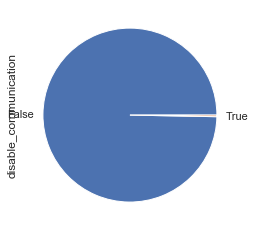

In [24]:
# since almost always False, not much information gained by keeping this feature
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.disable_communication.value_counts(normalize=True).plot(kind='pie');

List of dropped columns:
* converted_pledged_amount
* currency
* currency_symbol
* currency_trailing_code
* current_currency
* fx_rate
* photo
* pledged
* profile
* slug
* disable_communication
* spotlight
* state_changed_at
* source_url
* usd_type

In [25]:
cols = ['converted_pledged_amount', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'fx_rate', 'photo', 'pledged', 'profile', 'slug','disable_communication', 'spotlight', 'state_changed_at', 'source_url', 'usd_type']
df.drop(cols, axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 18 columns):
backers_count      209222 non-null int64
blurb              209214 non-null object
category           209222 non-null object
country            209222 non-null object
created_at         209222 non-null int64
creator            209222 non-null object
deadline           209222 non-null int64
goal               209222 non-null float64
id                 209222 non-null int64
is_starrable       209222 non-null bool
launched_at        209222 non-null int64
location           208996 non-null object
name               209222 non-null object
staff_pick         209222 non-null bool
state              209222 non-null object
static_usd_rate    209222 non-null float64
urls               209222 non-null object
usd_pledged        209222 non-null float64
dtypes: bool(2), float64(3), int64(5), object(8)
memory usage: 25.9+ MB


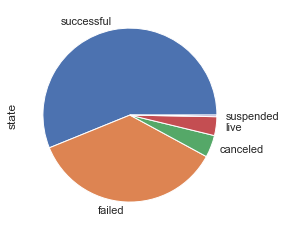

In [27]:
# most important states / outcomes successful and failed
df['state'].value_counts(normalize=True).plot(kind='pie');

In [28]:
# rename state to outcome
df = df.rename({'state': 'outcome'}, axis=1)

## How to deal with remaining columns?

### Blurb

In [29]:
# Natural language processing? / Length of the Text
df['blurb_length'] = df['blurb'].str.split().str.len()
df['blurb_length'].head()

0    2.00
1   22.00
2   15.00
3   23.00
4   24.00
Name: blurb_length, dtype: float64

In [30]:
# Drop blurb variable
df.drop('blurb', axis=1, inplace=True)

### Datetime / Creating Launch Length / Campain Length

In [31]:
# Transformation Timestamp to Datetime
pd.to_datetime(df.created_at, origin='unix', unit='s').head()

0   2018-11-05 23:06:45
1   2017-08-02 14:28:13
2   2012-09-30 06:45:33
3   2017-01-07 09:11:11
4   2012-12-06 18:04:31
Name: created_at, dtype: datetime64[ns]

In [32]:
pd.to_datetime(df.deadline, origin='unix', unit='s').head()

0   2019-03-14 05:02:55
1   2017-09-09 17:00:59
2   2013-06-12 05:03:15
3   2017-03-13 17:22:56
4   2013-01-09 20:32:07
Name: deadline, dtype: datetime64[ns]

In [33]:
# bring the timestams to datetime format
cols = ['created_at', 'deadline', 'launched_at']
for c in cols:
    df[c] = pd.to_datetime(df[c], origin='unix', unit='s')

In [34]:
# Creating Launch Length
df['creation_launch_days'] = df['launched_at'] - df['created_at']
df['creation_launch_days'] = df['creation_launch_days'].dt.round('d').dt.days

In [35]:
# Campain Length
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days

In [36]:
# Deadline day of week
df['deadline_day'] = df['deadline'].dt.weekday_name
# Deadline month
df['deadline_month'] = df['deadline'].dt.month_name()

In [37]:
def create_season(x):
    spring = range(80, 172)
    summer = range(172, 264)
    fall = range(264, 355)
    # winter = everything else
    doy = x.timetuple().tm_yday
    if doy in spring:
        return 'spring'
    elif doy in summer:
        return 'summer'
    elif doy in fall:
        return 'fall'
    return 'winter'

df['launched_season'] = df.launched_at.apply(create_season)

In [38]:
df.head()

,backers_count,category,country,created_at,creator,deadline,goal,id,is_starrable,launched_at,location,name,staff_pick,outcome,static_usd_rate,urls,usd_pledged,blurb_length,creation_launch_days,campaign_days,deadline_day,deadline_month,launched_season
0,315,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",US,2018-11-05 23:06:45,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",2019-03-14 05:02:55,28000.00,2108505034,False,2019-01-23 06:02:55,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,False,live,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",28645.00,2.00,78,50,Thursday,March,winter
1,47,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",US,2017-08-02 14:28:13,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",2017-09-09 17:00:59,1000.00,928751314,False,2017-08-10 17:00:59,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",1950.00,22.00,8,30,Saturday,September,summer
2,271,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",US,2012-09-30 06:45:33,"{""id"":323849677,""name"":""Electra"",""is_registere...",2013-06-12 05:03:15,15000.00,928014092,False,2013-05-13 05:03:15,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",22404.00,15.00,225,30,Wednesday,June,spring
3,3,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",GB,2017-01-07 09:11:11,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",2017-03-13 17:22:56,10000.00,596091328,False,2017-01-12 18:22:56,"{""id"":475457,""name"":""Kaunas"",""slug"":""kaunas-ka...",The Mist of Tribunal - A Card Game,False,failed,1.22,"{""web"":{""project"":""https://www.kickstarter.com...",165.38,23.00,5,60,Monday,March,winter
4,3,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",US,2012-12-06 18:04:31,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",2013-01-09 20:32:07,2800.00,998516049,False,2012-12-10 20:32:07,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t...",Help change the face of Brain Impairment,False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",2820.00,24.00,4,30,Wednesday,January,fall


### Category

In [39]:
# Extracting of Category and Subcategory out of the category column
df.iloc[0]['category']

'{"id":266,"name":"Footwear","slug":"fashion/footwear","position":5,"parent_id":9,"color":16752598,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/fashion/footwear"}}}'

In [40]:
df.iloc[0]['category'].split('/')[6]
df.iloc[0]['category'].split('","position"')[0]

'{"id":266,"name":"Footwear","slug":"fashion/footwear'

In [41]:
#df.iloc[0]['category'].split('/')[7].split('"}}}')[0]
df.iloc[0]['category'].split('/')[1].split('","position')[0]

'footwear'

In [42]:
df['sub_category'] = df.apply(lambda x: x['category'].split('/')[1].split('","position')[0],axis=1)
df['category'] = df.apply(lambda x: x['category'].split('"slug":"')[1].split('/')[0],axis=1)
df['category'] = df.apply(lambda x: x['category'].split('","position"')[0], axis=1)
df.head()        

,backers_count,category,country,created_at,creator,deadline,goal,id,is_starrable,launched_at,location,name,staff_pick,outcome,static_usd_rate,urls,usd_pledged,blurb_length,creation_launch_days,campaign_days,deadline_day,deadline_month,launched_season,sub_category
0,315,fashion,US,2018-11-05 23:06:45,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",2019-03-14 05:02:55,28000.00,2108505034,False,2019-01-23 06:02:55,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,False,live,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",28645.00,2.00,78,50,Thursday,March,winter,footwear
1,47,games,US,2017-08-02 14:28:13,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",2017-09-09 17:00:59,1000.00,928751314,False,2017-08-10 17:00:59,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",1950.00,22.00,8,30,Saturday,September,summer,playing cards
2,271,music,US,2012-09-30 06:45:33,"{""id"":323849677,""name"":""Electra"",""is_registere...",2013-06-12 05:03:15,15000.00,928014092,False,2013-05-13 05:03:15,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",22404.00,15.00,225,30,Wednesday,June,spring,rock
3,3,games,GB,2017-01-07 09:11:11,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",2017-03-13 17:22:56,10000.00,596091328,False,2017-01-12 18:22:56,"{""id"":475457,""name"":""Kaunas"",""slug"":""kaunas-ka...",The Mist of Tribunal - A Card Game,False,failed,1.22,"{""web"":{""project"":""https://www.kickstarter.com...",165.38,23.00,5,60,Monday,March,winter,playing cards
4,3,publishing,US,2012-12-06 18:04:31,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",2013-01-09 20:32:07,2800.00,998516049,False,2012-12-10 20:32:07,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t...",Help change the face of Brain Impairment,False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",2820.00,24.00,4,30,Wednesday,January,fall,nonfiction


In [43]:
df.loc[:, ['category','sub_category']].head()

,category,sub_category
0,fashion,footwear
1,games,playing cards
2,music,rock
3,games,playing cards
4,publishing,nonfiction


In [44]:
df['sub_category'].value_counts().head()

                  9041
web               4570
product design    4351
tabletop games    4057
accessories       3562
Name: sub_category, dtype: int64

In [45]:
# for a lot of subcategories I dont have data
#df = df.loc[df['sub_category'] != ""]

In [46]:
df['sub_category'].value_counts().head()

                  9041
web               4570
product design    4351
tabletop games    4057
accessories       3562
Name: sub_category, dtype: int64

### Location

In [47]:
# Extraction of City and State out of the location column
df.iloc[0]['location']

'{"id":2462429,"name":"Novato","slug":"novato-ca","short_name":"Novato, CA","displayable_name":"Novato, CA","localized_name":"Novato","country":"US","state":"CA","type":"Town","is_root":false,"urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/novato-ca","location":"https://www.kickstarter.com/locations/novato-ca"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1552595066.49b64db66a5124f5831752d055cd09aff20cc652&woe_id=2462429"}}}'

In [48]:
df.iloc[0]['location'].split(',')[3].split('"short_name":"')[1]

'Novato'

In [49]:
df.iloc[1311]
df.info()
df.isnull().sum().sort_values(ascending=False)
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 24 columns):
backers_count           209222 non-null int64
category                209222 non-null object
country                 209222 non-null object
created_at              209222 non-null datetime64[ns]
creator                 209222 non-null object
deadline                209222 non-null datetime64[ns]
goal                    209222 non-null float64
id                      209222 non-null int64
is_starrable            209222 non-null bool
launched_at             209222 non-null datetime64[ns]
location                208996 non-null object
name                    209222 non-null object
staff_pick              209222 non-null bool
outcome                 209222 non-null object
static_usd_rate         209222 non-null float64
urls                    209222 non-null object
usd_pledged             209222 non-null float64
blurb_length            209214 non-null float64
creation_launch_days 

In [50]:
df['city'] = df.apply(lambda x: x['location'].split(',')[3].split('"short_name":"')[1],axis=1)

In [51]:
df.iloc[0]['location'].split(',')[4].split('"')[0].strip()

'CA'

In [52]:
df['state'] = df.apply(lambda x: x['location'].split(',')[4].split('"')[0].strip(),axis=1)

In [53]:
df.head()

,backers_count,category,country,created_at,creator,deadline,goal,id,is_starrable,launched_at,location,name,staff_pick,outcome,static_usd_rate,urls,usd_pledged,blurb_length,creation_launch_days,campaign_days,deadline_day,deadline_month,launched_season,sub_category,city,state
0,315,fashion,US,2018-11-05 23:06:45,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",2019-03-14 05:02:55,28000.00,2108505034,False,2019-01-23 06:02:55,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,False,live,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",28645.00,2.00,78,50,Thursday,March,winter,footwear,Novato,CA
1,47,games,US,2017-08-02 14:28:13,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",2017-09-09 17:00:59,1000.00,928751314,False,2017-08-10 17:00:59,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",1950.00,22.00,8,30,Saturday,September,summer,playing cards,Euless,TX
2,271,music,US,2012-09-30 06:45:33,"{""id"":323849677,""name"":""Electra"",""is_registere...",2013-06-12 05:03:15,15000.00,928014092,False,2013-05-13 05:03:15,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",22404.00,15.00,225,30,Wednesday,June,spring,rock,Hollywood,CA
3,3,games,GB,2017-01-07 09:11:11,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",2017-03-13 17:22:56,10000.00,596091328,False,2017-01-12 18:22:56,"{""id"":475457,""name"":""Kaunas"",""slug"":""kaunas-ka...",The Mist of Tribunal - A Card Game,False,failed,1.22,"{""web"":{""project"":""https://www.kickstarter.com...",165.38,23.00,5,60,Monday,March,winter,playing cards,Kaunas,Lithuania
4,3,publishing,US,2012-12-06 18:04:31,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",2013-01-09 20:32:07,2800.00,998516049,False,2012-12-10 20:32:07,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t...",Help change the face of Brain Impairment,False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",2820.00,24.00,4,30,Wednesday,January,fall,nonfiction,Traverse City,MI


In [54]:
# There have been mistakes in the Country Column therefore we have extracted the Country Code again from the location column
def extract_country_code(x):
    try:
        tmp = str(x).split('country":"')
        if(len(tmp) > 1):
            tmp = tmp[1].split('"')[0]
        else:        
            tmp = ""
        return tmp
    except:
        print("Exception: ", x)
        return ""
df['country_extracted'] = df.location.apply(extract_country_code)

df.country_extracted.unique()

array(['US', 'LT', 'GB', 'FR', 'AU', 'NZ', 'ES', 'IT', 'NO', 'NL', 'CA',
       'SG', 'AR', 'AQ', 'MX', 'SE', 'IN', 'IE', 'DE', 'PE', 'CL', 'ID',
       'BE', 'JP', 'HK', 'KE', 'KR', 'IR', 'IS', 'IL', 'PR', 'HU', 'BG',
       'DK', 'CH', 'JM', 'CN', 'CZ', 'HT', 'RU', 'EC', 'GR', 'BA', 'AT',
       'SR', 'TH', 'PL', 'IQ', 'SL', 'TW', 'BR', 'PA', 'GH', 'UG', 'GT',
       'SI', 'ZA', 'EG', 'RO', 'AF', 'BD', 'LR', 'VN', 'MA', 'RW', 'UA',
       'RS', 'LV', 'SK', 'CG', 'BZ', 'CR', 'SJ', 'NG', 'PT', 'CI', 'NP',
       'SN', 'NI', 'TR', 'AE', 'MN', 'MY', 'VI', 'PS', 'PK', 'CK', 'MM',
       'LY', 'TT', 'CO', 'CM', 'YE', 'MK', 'LU', 'FI', 'GE', 'PH', 'KH',
       'EE', 'FO', 'BO', 'MU', 'TZ', 'CY', 'HN', 'CD', 'BT', 'LS', 'MW',
       'KZ', 'DO', 'GY', 'BS', 'GU', 'CU', 'ZW', 'ZM', 'BF', 'ET', 'TN',
       'GL', 'ML', 'FM', 'SY', 'HR', 'SX', 'LB', 'BW', 'AM', 'DJ', 'VU',
       'SV', 'AG', 'FJ', 'MO', 'JO', 'NE', 'UY', 'MT', 'DM', 'NA', 'GN',
       'MG', 'KG', 'QA', 'BY', 'VE', 'LK', 'PY', 'M

In [55]:
df.drop(['location','country'], axis=1, inplace=True)

In [56]:
df[['id','country_extracted','state','city']][(df.country_extracted == 'US')].state.value_counts().count()

51

In [57]:
df.head()

,backers_count,category,created_at,creator,deadline,goal,id,is_starrable,launched_at,name,staff_pick,outcome,static_usd_rate,urls,usd_pledged,blurb_length,creation_launch_days,campaign_days,deadline_day,deadline_month,launched_season,sub_category,city,state,country_extracted
0,315,fashion,2018-11-05 23:06:45,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",2019-03-14 05:02:55,28000.00,2108505034,False,2019-01-23 06:02:55,Babalus Children's Shoes,False,live,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",28645.00,2.00,78,50,Thursday,March,winter,footwear,Novato,CA,US
1,47,games,2017-08-02 14:28:13,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",2017-09-09 17:00:59,1000.00,928751314,False,2017-08-10 17:00:59,The Ofrenda Oracle Deck,False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",1950.00,22.00,8,30,Saturday,September,summer,playing cards,Euless,TX,US
2,271,music,2012-09-30 06:45:33,"{""id"":323849677,""name"":""Electra"",""is_registere...",2013-06-12 05:03:15,15000.00,928014092,False,2013-05-13 05:03:15,"Record Electra's Debut Album (Pop, Rock, Class...",False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",22404.00,15.00,225,30,Wednesday,June,spring,rock,Hollywood,CA,US
3,3,games,2017-01-07 09:11:11,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",2017-03-13 17:22:56,10000.00,596091328,False,2017-01-12 18:22:56,The Mist of Tribunal - A Card Game,False,failed,1.22,"{""web"":{""project"":""https://www.kickstarter.com...",165.38,23.00,5,60,Monday,March,winter,playing cards,Kaunas,Lithuania,LT
4,3,publishing,2012-12-06 18:04:31,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",2013-01-09 20:32:07,2800.00,998516049,False,2012-12-10 20:32:07,Help change the face of Brain Impairment,False,successful,1.00,"{""web"":{""project"":""https://www.kickstarter.com...",2820.00,24.00,4,30,Wednesday,January,fall,nonfiction,Traverse City,MI,US


### Creator

In [58]:
# Extract the creator
def extract_creator_is_registered(x):
    first = x.split(",")[3].split(":")
    if(len(first) > 1):
        first = first[1].replace('"','')
        return first
    return "null"

df['creator_registered'] = df.creator.apply(extract_creator_is_registered)

df.drop(['creator'], axis=1, inplace=True)

### Goal

In [59]:
# Goal is in original currency, which we have to change
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'],2)
df.drop(['goal', 'static_usd_rate'], axis=1, inplace=True)
df.head()

,backers_count,category,created_at,deadline,id,is_starrable,launched_at,name,staff_pick,outcome,urls,usd_pledged,blurb_length,creation_launch_days,campaign_days,deadline_day,deadline_month,launched_season,sub_category,city,state,country_extracted,creator_registered,usd_goal
0,315,fashion,2018-11-05 23:06:45,2019-03-14 05:02:55,2108505034,False,2019-01-23 06:02:55,Babalus Children's Shoes,False,live,"{""web"":{""project"":""https://www.kickstarter.com...",28645.00,2.00,78,50,Thursday,March,winter,footwear,Novato,CA,US,null,28000.00
1,47,games,2017-08-02 14:28:13,2017-09-09 17:00:59,928751314,False,2017-08-10 17:00:59,The Ofrenda Oracle Deck,False,successful,"{""web"":{""project"":""https://www.kickstarter.com...",1950.00,22.00,8,30,Saturday,September,summer,playing cards,Euless,TX,US,null,1000.00
2,271,music,2012-09-30 06:45:33,2013-06-12 05:03:15,928014092,False,2013-05-13 05:03:15,"Record Electra's Debut Album (Pop, Rock, Class...",False,successful,"{""web"":{""project"":""https://www.kickstarter.com...",22404.00,15.00,225,30,Wednesday,June,spring,rock,Hollywood,CA,US,null,15000.00
3,3,games,2017-01-07 09:11:11,2017-03-13 17:22:56,596091328,False,2017-01-12 18:22:56,The Mist of Tribunal - A Card Game,False,failed,"{""web"":{""project"":""https://www.kickstarter.com...",165.38,23.00,5,60,Monday,March,winter,playing cards,Kaunas,Lithuania,LT,null,12160.66
4,3,publishing,2012-12-06 18:04:31,2013-01-09 20:32:07,998516049,False,2012-12-10 20:32:07,Help change the face of Brain Impairment,False,successful,"{""web"":{""project"":""https://www.kickstarter.com...",2820.00,24.00,4,30,Wednesday,January,fall,nonfiction,Traverse City,MI,US,null,2800.00


### Mean pledge per backer

In [60]:
df['pledge_per_backer'] = round(df['usd_pledged']/df['backers_count'],2)

## Rearraging a bit

In [61]:
df.columns.values.shape

(25,)

In [62]:
cols = ['id','creator_registered','name','blurb_length','country_extracted','state','city','category','sub_category','created_at','launched_at', 'deadline','deadline_day','deadline_month','launched_season','creation_launch_days','campaign_days','backers_count','is_starrable','staff_pick','pledge_per_backer','usd_pledged','usd_goal','outcome','urls']
len(cols)

df = df[cols]
df.head(100)

,id,creator_registered,name,blurb_length,country_extracted,state,city,category,sub_category,created_at,launched_at,deadline,deadline_day,deadline_month,launched_season,creation_launch_days,campaign_days,backers_count,is_starrable,staff_pick,pledge_per_backer,usd_pledged,usd_goal,outcome,urls
0,2108505034,null,Babalus Children's Shoes,2.00,US,CA,Novato,fashion,footwear,2018-11-05 23:06:45,2019-01-23 06:02:55,2019-03-14 05:02:55,Thursday,March,winter,78,50,315,False,False,90.94,28645.00,28000.00,live,"{""web"":{""project"":""https://www.kickstarter.com..."
1,928751314,null,The Ofrenda Oracle Deck,22.00,US,TX,Euless,games,playing cards,2017-08-02 14:28:13,2017-08-10 17:00:59,2017-09-09 17:00:59,Saturday,September,summer,8,30,47,False,False,41.49,1950.00,1000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com..."
2,928014092,null,"Record Electra's Debut Album (Pop, Rock, Class...",15.00,US,CA,Hollywood,music,rock,2012-09-30 06:45:33,2013-05-13 05:03:15,2013-06-12 05:03:15,Wednesday,June,spring,225,30,271,False,False,82.67,22404.00,15000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com..."
3,596091328,null,The Mist of Tribunal - A Card Game,23.00,LT,Lithuania,Kaunas,games,playing cards,2017-01-07 09:11:11,2017-01-12 18:22:56,2017-03-13 17:22:56,Monday,March,winter,5,60,3,False,False,55.13,165.38,12160.66,failed,"{""web"":{""project"":""https://www.kickstarter.com..."
4,998516049,null,Help change the face of Brain Impairment,24.00,US,MI,Traverse City,publishing,nonfiction,2012-12-06 18:04:31,2012-12-10 20:32:07,2013-01-09 20:32:07,Wednesday,January,fall,4,30,3,False,False,940.00,2820.00,2800.00,successful,"{""web"":{""project"":""https://www.kickstarter.com..."
5,1224600291,null,Annapolis Chamber Music Project,18.00,US,MD,Annapolis,music,classical music,2014-10-24 17:35:50,2015-04-02 02:25:46,2015-05-02 02:25:46,Saturday,May,spring,159,30,35,False,False,106.43,3725.00,3500.00,successful,"{""web"":{""project"":""https://www.kickstarter.com..."
6,1778058413,null,The Tekalli Duo's New Music and New Concert Se...,20.00,US,CT,New Haven,music,classical music,2013-09-01 01:12:35,2013-09-11 23:07:29,2013-10-12 01:12:00,Saturday,October,summer,11,30,71,False,False,54.79,3890.00,2500.00,successful,"{""web"":{""project"":""https://www.kickstarter.com..."
7,1481360049,null,The Swing Album: A Slam-Bangin' Lindy Hoppin' ...,22.00,US,UT,Kaysville,music,,2019-01-08 16:38:03,2019-01-14 14:15:05,2019-02-13 14:15:05,Wednesday,February,winter,6,30,33,False,True,20.00,660.00,400.00,successful,"{""web"":{""project"":""https://www.kickstarter.com..."
8,962374325,null,The Hold-up,25.00,GB,UK,Northampton,theater,immersive,2016-03-24 11:20:44,2016-04-12 13:56:24,2016-05-10 23:00:00,Tuesday,May,spring,19,28,14,False,False,37.84,529.79,529.79,successful,"{""web"":{""project"":""https://www.kickstarter.com..."
9,1915400457,null,Dragon Age Character Profile Hard Enamel Pin B...,9.00,GB,UK,Wolverhampton,fashion,accessories,2019-01-09 22:05:06,2019-01-21 13:00:01,2019-02-20 13:00:01,Wednesday,February,winter,12,30,76,False,False,33.11,2516.16,489.32,successful,"{""web"":{""project"":""https://www.kickstarter.com..."


## Checking for null values / duplicates

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208988 entries, 0 to 209221
Data columns (total 25 columns):
id                      208988 non-null int64
creator_registered      208988 non-null object
name                    208988 non-null object
blurb_length            208988 non-null float64
country_extracted       208988 non-null object
state                   208988 non-null object
city                    208988 non-null object
category                208988 non-null object
sub_category            208988 non-null object
created_at              208988 non-null datetime64[ns]
launched_at             208988 non-null datetime64[ns]
deadline                208988 non-null datetime64[ns]
deadline_day            208988 non-null object
deadline_month          208988 non-null object
launched_season         208988 non-null object
creation_launch_days    208988 non-null int64
campaign_days           208988 non-null int64
backers_count           208988 non-null int64
is_starrable          

In [64]:
df.pledge_per_backer.fillna(0, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208988 entries, 0 to 209221
Data columns (total 25 columns):
id                      208988 non-null int64
creator_registered      208988 non-null object
name                    208988 non-null object
blurb_length            208988 non-null float64
country_extracted       208988 non-null object
state                   208988 non-null object
city                    208988 non-null object
category                208988 non-null object
sub_category            208988 non-null object
created_at              208988 non-null datetime64[ns]
launched_at             208988 non-null datetime64[ns]
deadline                208988 non-null datetime64[ns]
deadline_day            208988 non-null object
deadline_month          208988 non-null object
launched_season         208988 non-null object
creation_launch_days    208988 non-null int64
campaign_days           208988 non-null int64
backers_count           208988 non-null int64
is_starrable          

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182833 entries, 0 to 209221
Data columns (total 25 columns):
id                      182833 non-null int64
creator_registered      182833 non-null object
name                    182833 non-null object
blurb_length            182833 non-null float64
country_extracted       182833 non-null object
state                   182833 non-null object
city                    182833 non-null object
category                182833 non-null object
sub_category            182833 non-null object
created_at              182833 non-null datetime64[ns]
launched_at             182833 non-null datetime64[ns]
deadline                182833 non-null datetime64[ns]
deadline_day            182833 non-null object
deadline_month          182833 non-null object
launched_season         182833 non-null object
creation_launch_days    182833 non-null int64
campaign_days           182833 non-null int64
backers_count           182833 non-null int64
is_starrable          

In [68]:
df[df.duplicated(subset='id', keep=False)].sort_values(by=['id','usd_pledged'], ascending=False)

,id,creator_registered,name,blurb_length,country_extracted,state,city,category,sub_category,created_at,launched_at,deadline,deadline_day,deadline_month,launched_season,creation_launch_days,campaign_days,backers_count,is_starrable,staff_pick,pledge_per_backer,usd_pledged,usd_goal,outcome,urls
25537,2136692451,null,Citadel of Terror - An Adventure for 5E and 1s...,19.00,US,TX,Dallas,games,tabletop games,2019-01-29 21:31:44,2019-02-12 14:37:13,2019-03-15 02:00:00,Friday,March,winter,14,30,95,False,False,36.11,3430.00,500.00,live,"{""api"":{""star"":""https://api.kickstarter.com/v1..."
32973,2136692451,null,Citadel of Terror - An Adventure for 5E and 1s...,19.00,US,TX,Dallas,games,tabletop games,2019-01-29 21:31:44,2019-02-12 14:37:13,2019-03-15 02:00:00,Friday,March,winter,14,30,95,False,False,36.11,3430.00,500.00,live,"{""web"":{""project"":""https://www.kickstarter.com..."
99089,2134481489,null,Storybook RPG,7.00,US,WI,Janesville,games,tabletop games,2019-02-14 23:06:00,2019-02-15 16:28:43,2019-04-05 22:16:00,Friday,April,winter,1,49,14,True,False,50.79,711.00,8000.00,live,"{""api"":{""star"":""https://api.kickstarter.com/v1..."
205245,2134481489,null,Storybook RPG,7.00,US,WI,Janesville,games,tabletop games,2019-02-14 23:06:00,2019-02-15 16:28:43,2019-04-05 22:16:00,Friday,April,winter,1,49,14,True,False,50.79,711.00,8000.00,live,"{""web"":{""project"":""https://www.kickstarter.com..."
153575,2130044048,null,Gibellini Film Holders,19.00,IT,Italy,Sassuolo,technology,camera equipment,2017-11-26 15:07:18,2017-12-01 08:36:43,2017-12-28 07:00:00,Thursday,December,fall,5,27,33,False,False,323.48,10674.73,5931.06,successful,"{""web"":{""project"":""https://www.kickstarter.com..."
150991,2130044048,null,Gibellini Film Holders,19.00,IT,Italy,Sassuolo,technology,camera equipment,2017-11-26 15:07:18,2017-12-01 08:36:43,2017-12-28 07:00:00,Thursday,December,fall,5,27,33,False,False,323.48,10674.73,5931.06,successful,"{""web"":{""project"":""https://www.kickstarter.com..."
160857,2129673921,null,Death by Trivia,19.00,US,NM,Santa Fe,games,tabletop games,2019-01-25 17:53:10,2019-02-19 14:34:25,2019-03-21 13:34:25,Thursday,March,winter,25,30,50,True,False,91.72,4586.00,12000.00,live,"{""api"":{""star"":""https://api.kickstarter.com/v1..."
164850,2129673921,null,Death by Trivia,19.00,US,NM,Santa Fe,games,tabletop games,2019-01-25 17:53:10,2019-02-19 14:34:25,2019-03-21 13:34:25,Thursday,March,winter,25,30,50,True,False,91.72,4586.00,12000.00,live,"{""web"":{""project"":""https://www.kickstarter.com..."
152773,2127481320,null,Railway Glass First Studio Album,19.00,MX,Mexico,Hermosillo,music,rock,2019-01-29 02:30:44,2019-02-18 02:58:43,2019-03-20 01:58:43,Wednesday,March,winter,20,30,3,True,False,9.42,28.26,779.51,live,"{""web"":{""project"":""https://www.kickstarter.com..."
37362,2127481320,null,Railway Glass First Studio Album,19.00,MX,Mexico,Hermosillo,music,rock,2019-01-29 02:30:44,2019-02-18 02:58:43,2019-03-20 01:58:43,Wednesday,March,winter,20,30,3,True,False,9.42,28.26,779.51,live,"{""web"":{""project"":""https://www.kickstarter.com..."


In [69]:
df.drop_duplicates(subset='id', keep='first', inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182032 entries, 0 to 209221
Data columns (total 25 columns):
id                      182032 non-null int64
creator_registered      182032 non-null object
name                    182032 non-null object
blurb_length            182032 non-null float64
country_extracted       182032 non-null object
state                   182032 non-null object
city                    182032 non-null object
category                182032 non-null object
sub_category            182032 non-null object
created_at              182032 non-null datetime64[ns]
launched_at             182032 non-null datetime64[ns]
deadline                182032 non-null datetime64[ns]
deadline_day            182032 non-null object
deadline_month          182032 non-null object
launched_season         182032 non-null object
creation_launch_days    182032 non-null int64
campaign_days           182032 non-null int64
backers_count           182032 non-null int64
is_starrable          

In [71]:
df.outcome.value_counts()

successful    94614
failed        74150
canceled       8607
live           4038
suspended       623
Name: outcome, dtype: int64

In [72]:
df = df[df['outcome'].isin(['successful', 'failed'])]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168764 entries, 1 to 209221
Data columns (total 25 columns):
id                      168764 non-null int64
creator_registered      168764 non-null object
name                    168764 non-null object
blurb_length            168764 non-null float64
country_extracted       168764 non-null object
state                   168764 non-null object
city                    168764 non-null object
category                168764 non-null object
sub_category            168764 non-null object
created_at              168764 non-null datetime64[ns]
launched_at             168764 non-null datetime64[ns]
deadline                168764 non-null datetime64[ns]
deadline_day            168764 non-null object
deadline_month          168764 non-null object
launched_season         168764 non-null object
creation_launch_days    168764 non-null int64
campaign_days           168764 non-null int64
backers_count           168764 non-null int64
is_starrable          

In [74]:
cols = ['created_at', 'deadline', 'launched_at']
for c in cols:
    df[c] = pd.to_datetime(df[c], origin='unix', unit='D', format='%Y-%m-%d').dt.date

In [75]:
df.head(1)

,id,creator_registered,name,blurb_length,country_extracted,state,city,category,sub_category,created_at,launched_at,deadline,deadline_day,deadline_month,launched_season,creation_launch_days,campaign_days,backers_count,is_starrable,staff_pick,pledge_per_backer,usd_pledged,usd_goal,outcome,urls
1,928751314,null,The Ofrenda Oracle Deck,22.00,US,TX,Euless,games,playing cards,2017-08-02,2017-08-10,2017-09-09,Saturday,September,summer,8,30,47,False,False,41.49,1950.00,1000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com..."


# Data Exploration

## Questions

* What are the categories to look at?
* What about spotlight? starrable etc? staff_pick?
* Why is America so special? 
* We are looking for customers only in North America
* How did the market develop over time for our categories?
* What are the main cities? What are the worst Cities or States?
* One Example for a horrible business case (from Kansas)
* How can you optimize your financial goal?
* Is there a specific time of the year to end your campaign?
* Is there a good day to end it?
* Who submitted the most projects?
* How high is our average pledge in this category? Who do we want to attack as potential investor? (rich, poor, etc.)
* Is it good to have a long description for your product?
* How long should your campain last?
* Does the period matter from time of creation to time of launch?
* Successful serial entrepreneur/s?
* What are our recommendation? What about the almost successful cases? Buckets: What makes cases very successful / successful / almost successful?
* Future Outlook: Expanding in the rest of the world

## To Do

* mean pledge per category => which category returns highest pledge?
* pledge per backer => target group identification
* negative examples: What NOT to do on Kickstarter! (f.e. 0 pledged, why?)
* staff_picked vs success
* most mean-pledge money per category
* project:
    - top10 projects [pledge, unexpected (pledge >>>>>>> goal)]
    - timespan creation to launch
    - success-rate per contribution phase/days (launch to deadline)
    - success-rate per season
    - mean blurp-length vs [success, fail]
* *buckets [almost-success]*
    *- what was missing compared to successful projects*
* location:
    - cities
    - states
* USA vs ROW - projects, success rate, 
* creator:
    - serial entrepreneur ?
    - success for serial entrepreneur
* timeline:
    - project count development per year/month (category?)
    - does season affect the outcome ?

## How many successful projects get a stack pick?

In [76]:
df[df.outcome == 'successful'].staff_pick.value_counts()

False    75261
True     19353
Name: staff_pick, dtype: int64

## Sorted category by number of projects

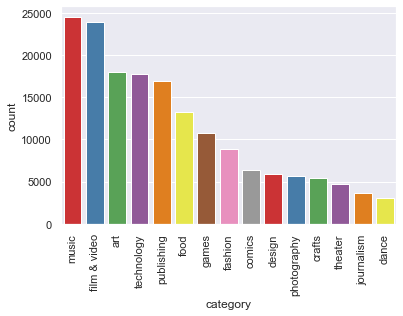

In [77]:
# To get an understanding what category could be interesting for us, we looked at the counts per category. Music, Film, Art and Technology seem to have a lot of projects on Kickstarter. 
chart = sns.countplot(df.category.sort_values(), order=df.category.value_counts().index, palette="Set1")
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

## Mean pledge per Category

In [78]:
mean_pledge_per_backer = pd.DataFrame(df.groupby("category")["pledge_per_backer"].mean()).reset_index()

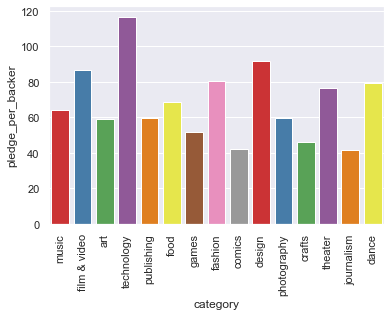

In [79]:
# How much money is a backer willing to pay for our category on average. In technology we seem to have generous backers. Outlook: It might therefore be interesting to tackle more wealthy people in technology 
chart = sns.barplot(x="category", y="pledge_per_backer", data=mean_pledge_per_backer, palette="Set1", order=df.category.value_counts().index)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

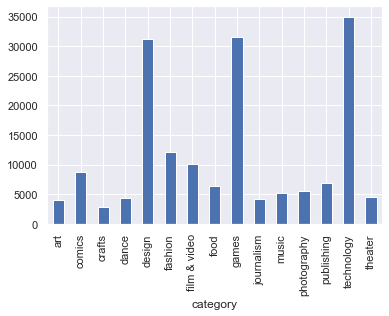

In [80]:
# also the mean pledge per category shows us that there might be quite a bit of money in technology
df.groupby('category').usd_pledged.mean().plot(kind='bar', rot=90);

In [81]:
#df['outcome'] = df.outcome.apply(lambda x: 1 if x == 'successful' else 0)

In [82]:
df[df.category == 'technology'].outcome.value_counts(normalize=True)

failed       0.64
successful   0.36
Name: outcome, dtype: float64

## USA vs Rest of the World / Where to locate our business?

In [83]:
# Location: NY and DE / Verbindet die Kunden mit Techbranche in Kalifornien
df['country'] = df.country_extracted.apply(lambda x: 'US' if x == 'US' else 'Rest of the World')
df['country'].value_counts(normalize=True)

US                  0.70
Rest of the World   0.30
Name: country, dtype: float64

## What State?

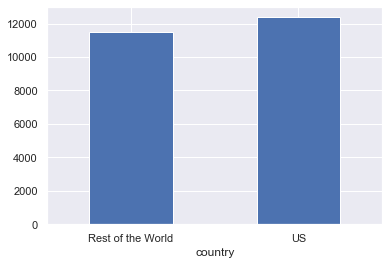

In [84]:
# There is even in average more money to make in the US
df.groupby('country').usd_pledged.mean().plot(kind='bar', rot=0);

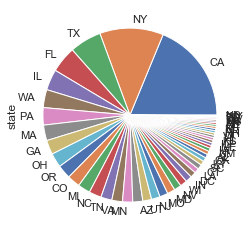

In [85]:
df_us = df.loc[df['country'] == 'US']
df_us['state'].value_counts().plot(kind='pie');
#df_us.groupby('state').country.count().plot(kind='bar', rot=0)

In [86]:
df_us.head(1)

,id,creator_registered,name,blurb_length,country_extracted,state,city,category,sub_category,created_at,launched_at,deadline,deadline_day,deadline_month,launched_season,creation_launch_days,campaign_days,backers_count,is_starrable,staff_pick,pledge_per_backer,usd_pledged,usd_goal,outcome,urls,country
1,928751314,null,The Ofrenda Oracle Deck,22.00,US,TX,Euless,games,playing cards,2017-08-02,2017-08-10,2017-09-09,Saturday,September,summer,8,30,47,False,False,41.49,1950.00,1000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US


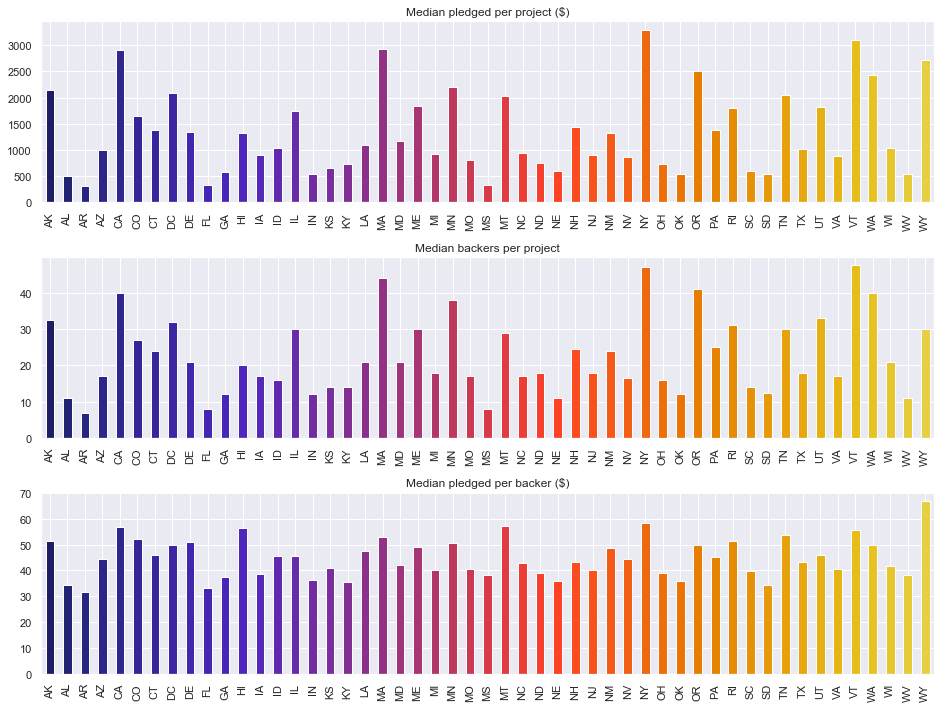

In [87]:
# What state would be best for the location of our company?
from matplotlib import cm
# Creating a dataframe grouped by country with columns for failed and successful
country_df = pd.get_dummies(df_us.set_index('state').outcome).groupby('state').sum()

# Plotting
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, figsize=(16,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df_us.state.nunique()))

df_us.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax1, color=color, rot=90)
ax1.set_title('Median pledged per project ($)')
ax1.set_xlabel('')

df_us.groupby('state').backers_count.median().plot(kind='bar', ax=ax2, color=color, rot=90)
ax2.set_title('Median backers per project')
ax2.set_xlabel('')

df_us.groupby('state').pledge_per_backer.median().plot(kind='bar', ax=ax3, color=color, rot=90)
ax3.set_title('Median pledged per backer ($)')
ax3.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

In [88]:
print(df_us.groupby('state').backers_count.median())
print(df_us.groupby('state').pledge_per_backer.median())
print(df_us.groupby('state').usd_pledged.median())
df_us

state
AK   32.50
AL   11.00
AR    7.00
AZ   17.00
CA   40.00
CO   27.00
CT   24.00
DC   32.00
DE   21.00
FL    8.00
GA   12.00
HI   20.00
IA   17.00
ID   16.00
IL   30.00
IN   12.00
KS   14.00
KY   14.00
LA   21.00
MA   44.00
MD   21.00
ME   30.00
MI   18.00
MN   38.00
MO   17.00
MS    8.00
MT   29.00
NC   17.00
ND   18.00
NE   11.00
NH   24.50
NJ   18.00
NM   24.00
NV   16.50
NY   47.00
OH   16.00
OK   12.00
OR   41.00
PA   25.00
RI   31.00
SC   14.00
SD   12.50
TN   30.00
TX   18.00
UT   33.00
VA   17.00
VT   47.50
WA   40.00
WI   21.00
WV   11.00
WY   30.00
Name: backers_count, dtype: float64
state
AK   51.46
AL   34.45
AR   31.59
AZ   44.50
CA   56.65
CO   52.03
CT   45.97
DC   50.00
DE   51.00
FL   33.13
GA   37.53
HI   56.60
IA   38.45
ID   45.67
IL   45.45
IN   36.26
KS   40.91
KY   35.65
LA   47.64
MA   53.08
MD   41.90
ME   49.19
MI   40.04
MN   50.50
MO   40.52
MS   38.14
MT   57.24
NC   42.97
ND   39.00
NE   35.71
NH   43.28
NJ   40.15
NM   48.54
NV   44.25
NY   58.56
OH   3

,id,creator_registered,name,blurb_length,country_extracted,state,city,category,sub_category,created_at,launched_at,deadline,deadline_day,deadline_month,launched_season,creation_launch_days,campaign_days,backers_count,is_starrable,staff_pick,pledge_per_backer,usd_pledged,usd_goal,outcome,urls,country
1,928751314,null,The Ofrenda Oracle Deck,22.00,US,TX,Euless,games,playing cards,2017-08-02,2017-08-10,2017-09-09,Saturday,September,summer,8,30,47,False,False,41.49,1950.00,1000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
2,928014092,null,"Record Electra's Debut Album (Pop, Rock, Class...",15.00,US,CA,Hollywood,music,rock,2012-09-30,2013-05-13,2013-06-12,Wednesday,June,spring,225,30,271,False,False,82.67,22404.00,15000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
4,998516049,null,Help change the face of Brain Impairment,24.00,US,MI,Traverse City,publishing,nonfiction,2012-12-06,2012-12-10,2013-01-09,Wednesday,January,fall,4,30,3,False,False,940.00,2820.00,2800.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
5,1224600291,null,Annapolis Chamber Music Project,18.00,US,MD,Annapolis,music,classical music,2014-10-24,2015-04-02,2015-05-02,Saturday,May,spring,159,30,35,False,False,106.43,3725.00,3500.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
6,1778058413,null,The Tekalli Duo's New Music and New Concert Se...,20.00,US,CT,New Haven,music,classical music,2013-09-01,2013-09-11,2013-10-12,Saturday,October,summer,11,30,71,False,False,54.79,3890.00,2500.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
7,1481360049,null,The Swing Album: A Slam-Bangin' Lindy Hoppin' ...,22.00,US,UT,Kaysville,music,,2019-01-08,2019-01-14,2019-02-13,Wednesday,February,winter,6,30,33,False,True,20.00,660.00,400.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
10,685750269,null,Calypso Wings: Fast. Fresh. Flavaful,6.00,US,GA,Buford,food,restaurants,2016-09-15,2016-09-15,2016-10-15,Saturday,October,summer,0,30,0,False,False,0.00,0.00,150000.00,failed,"{""web"":{""project"":""https://www.kickstarter.com...",US
11,1690615554,null,Pod Life: Podcaster's Stories,20.00,US,IL,Hoffman Estates,publishing,nonfiction,2017-07-20,2017-08-11,2017-09-05,Tuesday,September,summer,22,25,45,False,False,31.22,1405.00,800.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
13,1065920234,null,Cave Dwellers (double CD): Loren Nerell ~ Mark...,21.00,US,CA,Los Angeles,music,world music,2018-08-27,2018-09-01,2018-10-01,Monday,October,summer,5,30,150,False,False,35.49,5323.00,4500.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
14,1621825388,null,CHASE: What Matters Most? at Dixon Place,20.00,US,NY,Lower East Side,theater,experimental,2015-09-10,2015-09-16,2015-10-06,Tuesday,October,summer,6,20,37,False,True,190.14,7035.00,7000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US


In [89]:
# We chose New York as Location for our company, we can also relate to one of the most succesfull project by usd_pledged 
df_NY = df.loc[df['state'] == 'NY']
df_NY_technology = df_NY.loc[df['category'] == 'technology']
df_NY_technology.sort_values(['usd_pledged'], ascending=False).head(3)

,id,creator_registered,name,blurb_length,country_extracted,state,city,category,sub_category,created_at,launched_at,deadline,deadline_day,deadline_month,launched_season,creation_launch_days,campaign_days,backers_count,is_starrable,staff_pick,pledge_per_backer,usd_pledged,usd_goal,outcome,urls,country
114953,369559399,null,Tiko - The Unibody 3D Printer,19.00,US,NY,Niagara Falls,technology,3d printing,2015-03-26,2015-03-30,2015-04-30,Thursday,April,spring,5,31,16538,False,False,178.43,2950874.77,100000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
132902,775872412,null,"BioLite FirePit: See Fire, Not Smoke",22.00,US,NY,Brooklyn,technology,,2017-08-15,2017-09-18,2017-10-21,Saturday,October,summer,34,32,10238,False,True,247.51,2534017.00,100000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
73016,545596386,null,Vi. The First True Artificial Intelligence Per...,24.00,US,NY,New York,technology,wearables,2016-02-23,2016-06-01,2016-07-20,Wednesday,July,spring,100,49,7257,False,True,232.63,1688179.60,100000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US


https://www.kickstarter.com/projects/1050572498/vi-the-first-true-artificial-intelligence-personal

In [90]:
# Let's have a look on who failed
df_tech = df.loc[df['category'] == 'technology'] 
df_tech_goal = df_tech.loc[df_tech['usd_goal'] >= 10000000] 
df_tech_goal.sort_values(['usd_pledged'], ascending=True).head()

,id,creator_registered,name,blurb_length,country_extracted,state,city,category,sub_category,created_at,launched_at,deadline,deadline_day,deadline_month,launched_season,creation_launch_days,campaign_days,backers_count,is_starrable,staff_pick,pledge_per_backer,usd_pledged,usd_goal,outcome,urls,country
9234,2111193157,null,World's Best Robot,4.00,US,GA,Atlanta,technology,hardware,2014-10-08,2015-09-22,2015-10-12,Monday,October,fall,349,20,0,False,False,0.00,0.00,10000000.00,failed,"{""web"":{""project"":""https://www.kickstarter.com...",US
104386,1622360768,null,E-Voting by Smartphone: Direct Democracy 2016,8.00,US,CA,San Diego,technology,software,2015-08-26,2015-08-28,2015-09-01,Tuesday,September,summer,2,4,0,False,False,0.00,0.00,55000000.00,failed,"{""web"":{""project"":""https://www.kickstarter.com...",US
187128,922558703,null,the true Democracy machine,16.00,AU,AU,Melbourne,technology,web,2015-11-23,2015-11-23,2016-01-22,Friday,January,fall,1,60,0,False,False,0.00,0.00,14473948.00,failed,"{""web"":{""project"":""https://www.kickstarter.com...",Rest of the World
26834,1601563193,null,Our future,24.00,AU,AU,Brisbane,technology,space exploration,2014-08-02,2014-08-08,2014-10-07,Tuesday,October,summer,7,60,1,False,False,0.93,0.93,92894241.00,failed,"{""web"":{""project"":""https://www.kickstarter.com...",Rest of the World
163636,31686016,null,"Market / Expand ECT - Add Video, File transfer...",21.00,US,TX,Houston,technology,software,2016-01-08,2016-01-21,2016-03-21,Monday,March,winter,13,60,1,False,False,1.00,1.00,10000000.00,failed,"{""web"":{""project"":""https://www.kickstarter.com...",US


In [91]:
# We need a business case for our presentation
df_tech = df.loc[df['category'] == 'technology'] 
df_tech_goal = df_tech.loc[df_tech['usd_goal'] >= 1000000] 
df_tech_goal.sort_values(['usd_pledged'], ascending=False).head(80)

,id,creator_registered,name,blurb_length,country_extracted,state,city,category,sub_category,created_at,launched_at,deadline,deadline_day,deadline_month,launched_season,creation_launch_days,campaign_days,backers_count,is_starrable,staff_pick,pledge_per_backer,usd_pledged,usd_goal,outcome,urls,country
55326,557230947,null,"Bring Reading Rainbow Back for Every Child, Ev...",22.00,US,CA,Los Angeles,technology,web,2014-04-23,2014-05-28,2014-07-02,Wednesday,July,spring,35,35,105857,False,True,51.10,5408916.95,1000000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
8510,1966069095,null,ARKYD: A Space Telescope for Everyone,19.00,US,WA,Seattle,technology,space exploration,2012-07-10,2013-05-29,2013-07-01,Monday,July,spring,323,32,17614,False,True,85.46,1505366.60,1000000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
109999,685856908,null,Buddy Rescue by VineLight,21.00,US,AL,Auburn,technology,software,2014-12-17,2015-02-20,2015-03-22,Sunday,March,winter,65,30,63,False,False,238.89,15050.00,3000000.00,failed,"{""web"":{""project"":""https://www.kickstarter.com...",US
192590,1769093855,null,ShargeMe - Share your Charge with Me - Electri...,20.00,IT,Italy,Trieste,technology,apps,2017-11-28,2017-12-19,2018-01-18,Thursday,January,fall,21,30,28,False,False,477.03,13356.73,1176079.02,failed,"{""web"":{""project"":""https://www.kickstarter.com...",Rest of the World
139511,1457700976,null,SPIRITS Cocktailmaschine Cocktailmachine,15.00,DE,Germany,Duisburg,technology,hardware,2017-12-21,2018-02-09,2018-04-10,Tuesday,April,winter,50,60,17,False,False,615.54,10464.13,1225882.30,failed,"{""web"":{""project"":""https://www.kickstarter.com...",Rest of the World
127933,1990064958,null,FishingStation,6.00,HK,Hong Kong,Hong Kong,technology,hardware,2015-02-20,2015-09-30,2015-11-05,Thursday,November,fall,222,36,9,False,False,625.45,5629.04,1230429.15,failed,"{""web"":{""project"":""https://www.kickstarter.com...",Rest of the World
106910,1422228947,null,Alpha Bot : Human Pilotable Mecha,23.00,US,TX,Mesquite,technology,robots,2015-07-18,2015-07-21,2015-09-19,Saturday,September,summer,3,60,3,False,False,1671.67,5015.00,1500000.00,failed,"{""web"":{""project"":""https://www.kickstarter.com...",US
98370,1660056737,null,Leadership Development for the 21st Century,11.00,US,UT,Salt Lake City,technology,software,2015-12-30,2016-02-29,2016-04-29,Friday,April,winter,61,60,5,False,False,1000.60,5003.00,10000000.00,failed,"{""web"":{""project"":""https://www.kickstarter.com...",US
76828,1603503796,null,Kekatron EcologicWC,16.00,ES,Spain,España,technology,gadgets,2015-12-31,2016-03-31,2016-05-30,Monday,May,spring,91,60,7,False,False,689.78,4828.45,1007809.54,failed,"{""web"":{""project"":""https://www.kickstarter.com...",Rest of the World
175272,784946478,null,Heli Harbor,20.00,US,FL,West Palm Beach,technology,flight,2015-08-04,2017-10-26,2017-11-25,Saturday,November,fall,814,30,9,False,False,491.00,4419.00,1200000.00,failed,"{""web"":{""project"":""https://www.kickstarter.com...",US


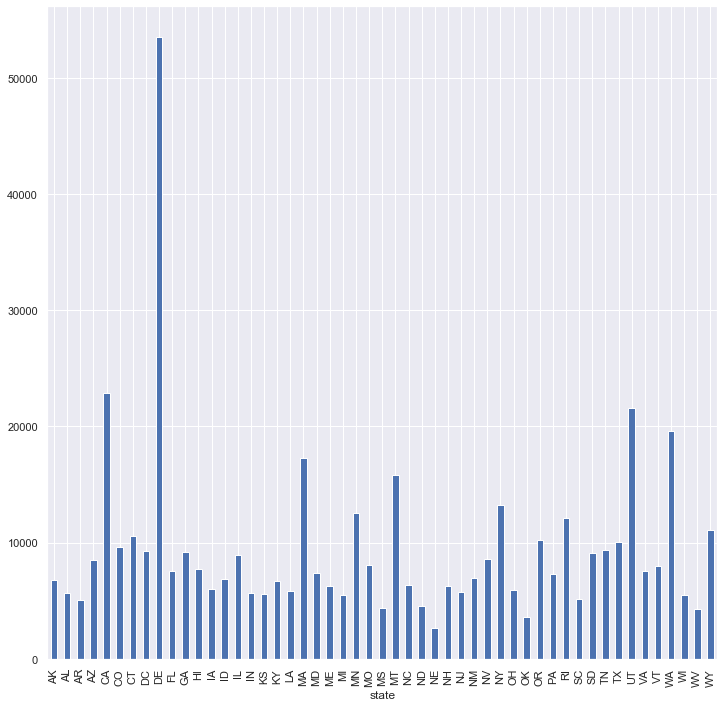

In [92]:
# We chose New York as Location for our company, but are also interested in Delaware because it's close and there might be some gold to find
plt.figure(figsize = (12, 12))
df_us.groupby('state').usd_pledged.mean().plot(kind='bar', rot=90);

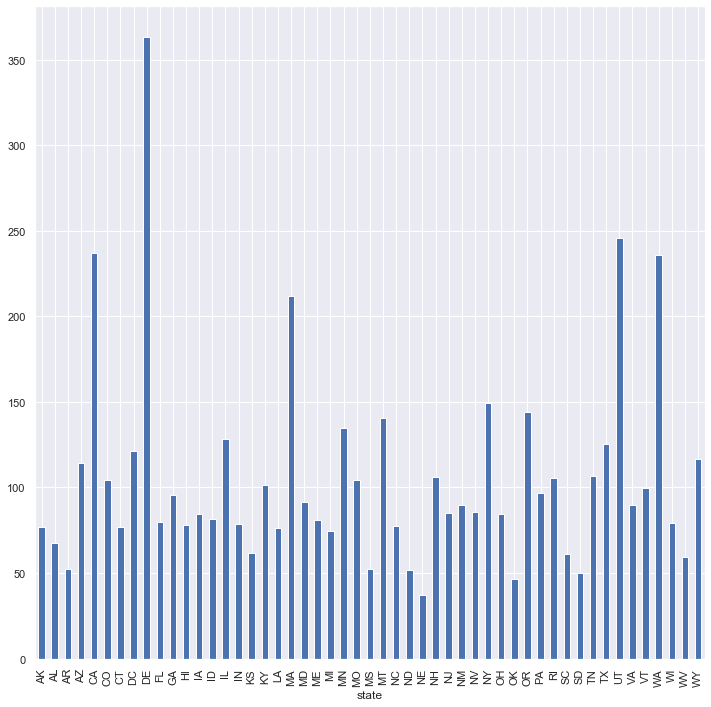

In [93]:
plt.figure(figsize = (12, 12))
df_us.groupby('state').backers_count.mean().plot(kind='bar', rot=90);

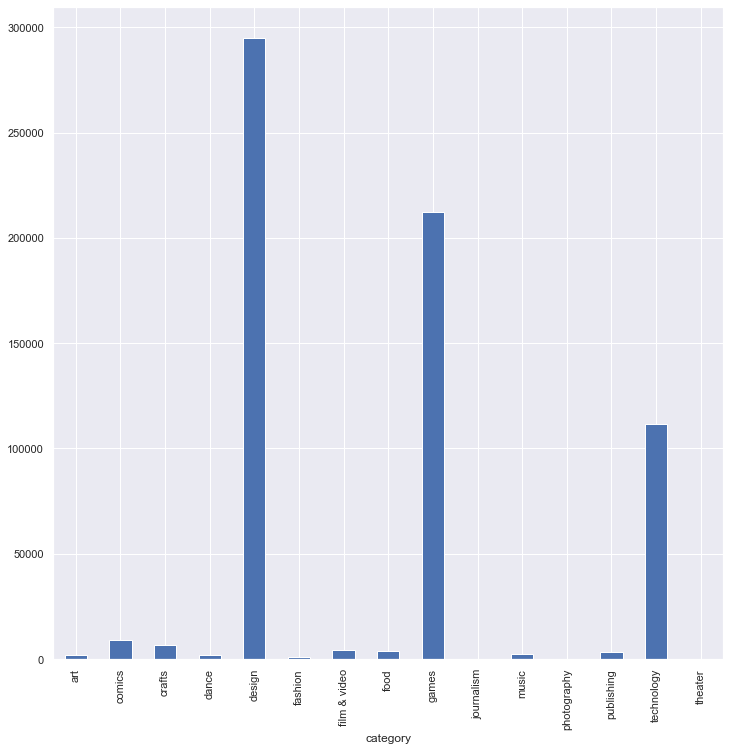

In [94]:
df_DE = df.loc[df['state'] == 'DE']
plt.figure(figsize = (12, 12))
df_DE.groupby('category').usd_pledged.mean().plot(kind='bar', rot=90);

In [95]:
df_DE
df_DE_technology = df_DE.loc[df['category'] == 'technology']
df_DE_technology.sort_values(['usd_pledged'], ascending=False).head(3)

,id,creator_registered,name,blurb_length,country_extracted,state,city,category,sub_category,created_at,launched_at,deadline,deadline_day,deadline_month,launched_season,creation_launch_days,campaign_days,backers_count,is_starrable,staff_pick,pledge_per_backer,usd_pledged,usd_goal,outcome,urls,country
49138,272195874,null,World's First Bacteria Killing Robot,15.00,US,DE,Wilmington,technology,wearables,2018-11-17,2018-11-27,2019-01-06,Sunday,January,fall,11,40,10474,False,False,113.41,1187861.42,3000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
17261,756844987,null,Raspad: Raspberry Pi Tablet For Your Creative ...,11.00,US,DE,Wilmington,technology,diy electronics,2018-01-25,2018-02-28,2018-04-04,Wednesday,April,winter,35,35,3393,False,True,180.07,610966.00,10000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US
9086,162780071,null,MUWI: Capture cinematic videos anywhere and at...,22.00,US,DE,Dover,technology,camera equipment,2018-03-23,2018-06-04,2018-07-04,Wednesday,July,spring,73,30,3126,False,False,194.83,609039.00,35000.00,successful,"{""web"":{""project"":""https://www.kickstarter.com...",US


https://www.kickstarter.com/projects/cleansebot/worlds-first-bacteria-killing-robot

In [96]:
# Insides for our customers / Goal Size / campaign length / 

# Even for the technology projects, we comment to lower the goal, since successful projects will be spotlighted and therefor will get more recognicition
# If the idea is good, the goal can be way surpased as seen in our example

# Technology projects have the highest goals by far (in terms of their median goal size), followed by food (e.g. funding for restaurants), with other categories generally much smaller in terms of their funding goals.

## Recomendations for our Customers

### Goal Size

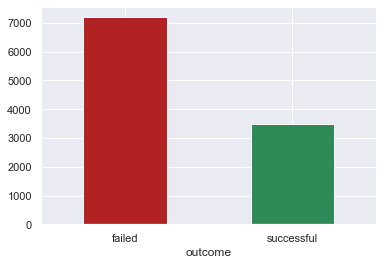

In [97]:
# Even for the technology projects, we comment to lower the goal, since successful projects will be spotlighted and therefor will get more recognicition
# If the idea is good, the goal can be way surpased as seen in our example
df.groupby('outcome').usd_goal.median().plot(kind='bar', color=['firebrick', 'seagreen'], rot=0);

### Campaign Length

In [98]:
### A longer campain lenght does not seem to have a positive influence on the outcome

In [99]:
df.groupby('outcome').campaign_days.mean()#.plot(kind='bar', color=['firebrick', 'seagreen'], rot=0);

outcome
failed       34.66
successful   31.03
Name: campaign_days, dtype: float64

### Creation to launch length

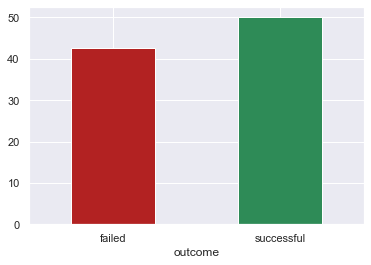

In [100]:
# When people have more time to get to know the project before it is launched, they seem to be more willing to support the project
df.groupby('outcome').creation_launch_days.mean().plot(kind='bar', color=['firebrick', 'seagreen'], rot=0);

### Deadline Day outcome

In [101]:
# check significance and delete from model
df.groupby('deadline_day')['outcome'].value_counts(normalize=True)

deadline_day  outcome   
Friday        successful   0.56
              failed       0.44
Monday        successful   0.57
              failed       0.43
Saturday      successful   0.56
              failed       0.44
Sunday        successful   0.54
              failed       0.46
Thursday      successful   0.57
              failed       0.43
Tuesday       successful   0.56
              failed       0.44
Wednesday     successful   0.56
              failed       0.44
Name: outcome, dtype: float64

### Launch Season

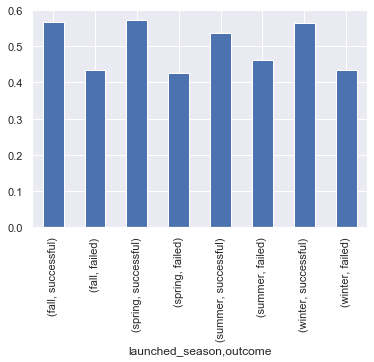

In [102]:
df.groupby("launched_season")['outcome'].value_counts(normalize=True).plot(kind="bar",rot=90)

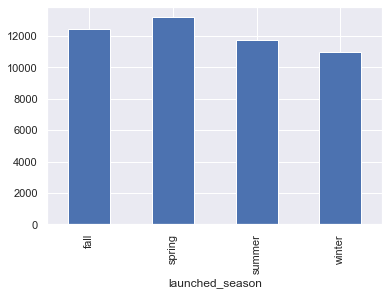

In [103]:
df.groupby('launched_season')['usd_pledged'].mean().plot(kind="bar", rot=90)

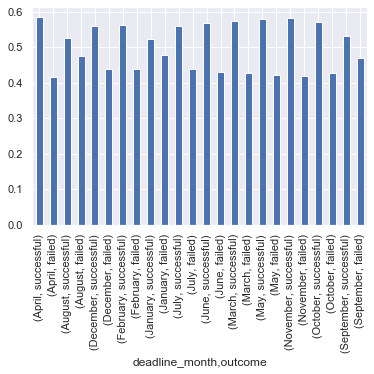

In [104]:
df.groupby("deadline_month")['outcome'].value_counts(normalize=True).plot(kind="bar",rot=90)

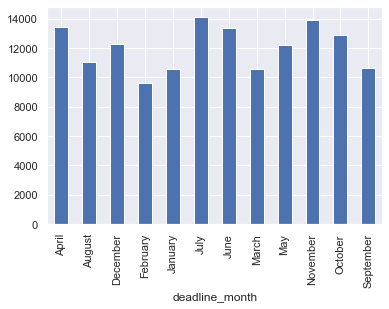

In [105]:
df.groupby('deadline_month')['usd_pledged'].mean().plot(kind="bar", rot=90);

### Word Analysis

In [106]:
# What are the most 'successful' names
def show_wordcloud(data, title = None):
    '''Split names by space and generate word counts.'''
    wordcloud = WordCloud(
        background_color='black',
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

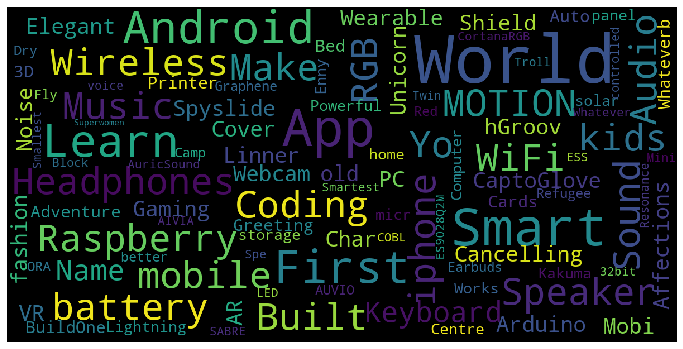

In [107]:
df_technology = df.loc[df['category'] == 'technology']
show_wordcloud(df_technology[df_technology.outcome == 'successful']['name'])

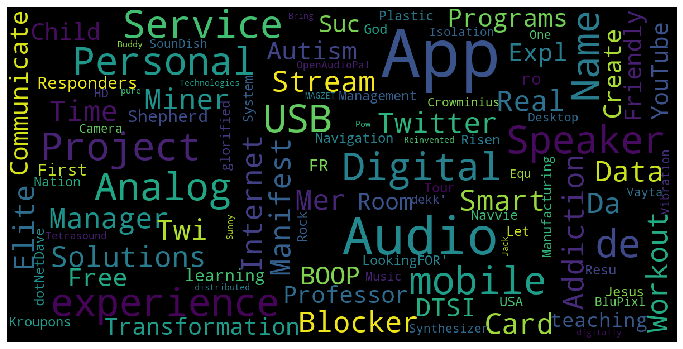

In [108]:
show_wordcloud(df_technology[df_technology.outcome == 'failed']['name'])

# Data Transformation / Feature Engineering

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168764 entries, 1 to 209221
Data columns (total 26 columns):
id                      168764 non-null int64
creator_registered      168764 non-null object
name                    168764 non-null object
blurb_length            168764 non-null float64
country_extracted       168764 non-null object
state                   168764 non-null object
city                    168764 non-null object
category                168764 non-null object
sub_category            168764 non-null object
created_at              168764 non-null object
launched_at             168764 non-null object
deadline                168764 non-null object
deadline_day            168764 non-null object
deadline_month          168764 non-null object
launched_season         168764 non-null object
creation_launch_days    168764 non-null int64
campaign_days           168764 non-null int64
backers_count           168764 non-null int64
is_starrable            168764 non-null bool
s

In [110]:
# change 'film & video' to 'film_video'
df.category.replace({'film & video':'film_video'},inplace=True)

In [111]:
# Plan für heute
# 1. US vs ROW => in binär - check
# 2. dummify ['category', deadline_day, launched_season] - check
# 3. Outcome => Bool - check
#

# borderline = 'state'
cols_dropped = ['name','sub_category','id','creator_registered','city','created_at','launched_at','deadline','deadline_month', 'urls','state']


In [112]:
model_cols = [x for x in df.columns if x not in cols_dropped]
model_cols

['blurb_length',
 'country_extracted',
 'category',
 'deadline_day',
 'launched_season',
 'creation_launch_days',
 'campaign_days',
 'backers_count',
 'is_starrable',
 'staff_pick',
 'pledge_per_backer',
 'usd_pledged',
 'usd_goal',
 'outcome',
 'country']

In [113]:
df_model = None
df_model = df[model_cols]

In [114]:
df_model.shape

(168764, 15)

## Country: 1-US, 0-ROW

In [115]:
# Country = 1: US, 0: Rest of the World
df_model['country'] = df_model.country_extracted.apply(lambda x: 1 if x == 'US' else 0)

In [116]:
# Dropping initial Country Feature
df_model.drop(['country_extracted'], axis = 1,inplace=True)

## Outcome: 1 successful, 0 failed

In [117]:
# Outcome = 1: successful, 0: failed
df_model['outcome'] = df_model.outcome.apply(lambda x: 1 if x == 'successful' else 0)

## Correlation Heatmap

In [118]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168764 entries, 1 to 209221
Data columns (total 14 columns):
blurb_length            168764 non-null float64
category                168764 non-null object
deadline_day            168764 non-null object
launched_season         168764 non-null object
creation_launch_days    168764 non-null int64
campaign_days           168764 non-null int64
backers_count           168764 non-null int64
is_starrable            168764 non-null bool
staff_pick              168764 non-null bool
pledge_per_backer       168764 non-null float64
usd_pledged             168764 non-null float64
usd_goal                168764 non-null float64
outcome                 168764 non-null int64
country                 168764 non-null int64
dtypes: bool(2), float64(4), int64(5), object(3)
memory usage: 22.1+ MB


In [119]:
df_model.head()

,blurb_length,category,deadline_day,launched_season,creation_launch_days,campaign_days,backers_count,is_starrable,staff_pick,pledge_per_backer,usd_pledged,usd_goal,outcome,country
1,22.00,games,Saturday,summer,8,30,47,False,False,41.49,1950.00,1000.00,1,1
2,15.00,music,Wednesday,spring,225,30,271,False,False,82.67,22404.00,15000.00,1,1
3,23.00,games,Monday,winter,5,60,3,False,False,55.13,165.38,12160.66,0,0
4,24.00,publishing,Wednesday,fall,4,30,3,False,False,940.00,2820.00,2800.00,1,1
5,18.00,music,Saturday,spring,159,30,35,False,False,106.43,3725.00,3500.00,1,1


In [120]:
drop = ['staff_pick', 'usd_pledged','backers_count','pledge_per_backer', 'is_starrable', 'deadline_day']
df_model.drop(drop, axis=1, inplace=True)
df_model.shape

(168764, 8)

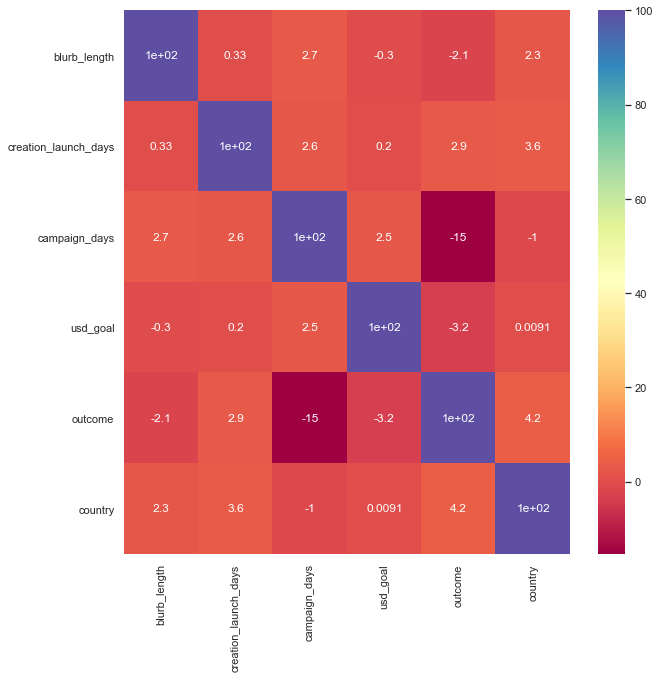

In [121]:
# Plot lower sector of heatmap with 

corr = df_model.corr()
plt.figure(figsize=(10,10))
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr*100, cmap="Spectral", annot=True)   

## Dummify Categorical

In [122]:
dummify = ['category','launched_season']
df_model = pd.get_dummies(df_model, columns=dummify, drop_first=True)

# Data Preparing

## Normalizing Numerical Features

In [123]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Initialize a scaler, then apply it to the features
scaler = StandardScaler()
numerical = [x for x in df_model.columns if x != 'outcome']
#['blurb_length','creation_launch_days','campaign_days','usd_goal']
df_model[numerical] = scaler.fit_transform(df_model[numerical])
#Show an example of a record with scaling applied
display(df_model.head(n = 10))

,blurb_length,creation_launch_days,campaign_days,usd_goal,outcome,country,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film_video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,launched_season_spring,launched_season_summer,launched_season_winter
1,0.60,-0.30,-0.22,-0.04,1,0.65,-0.20,-0.18,-0.13,-0.19,-0.24,-0.41,-0.29,3.84,-0.15,-0.41,-0.19,-0.33,-0.34,-0.17,-0.59,1.68,-0.55
2,-0.80,1.40,-0.22,-0.02,1,0.65,-0.20,-0.18,-0.13,-0.19,-0.24,-0.41,-0.29,-0.26,-0.15,2.42,-0.19,-0.33,-0.34,-0.17,1.70,-0.60,-0.55
3,0.80,-0.33,2.34,-0.03,0,-1.53,-0.20,-0.18,-0.13,-0.19,-0.24,-0.41,-0.29,3.84,-0.15,-0.41,-0.19,-0.33,-0.34,-0.17,-0.59,-0.60,1.82
4,1.00,-0.33,-0.22,-0.03,1,0.65,-0.20,-0.18,-0.13,-0.19,-0.24,-0.41,-0.29,-0.26,-0.15,-0.41,-0.19,2.99,-0.34,-0.17,-0.59,-0.60,-0.55
5,-0.20,0.88,-0.22,-0.03,1,0.65,-0.20,-0.18,-0.13,-0.19,-0.24,-0.41,-0.29,-0.26,-0.15,2.42,-0.19,-0.33,-0.34,-0.17,1.70,-0.60,-0.55
6,0.20,-0.28,-0.22,-0.03,1,0.65,-0.20,-0.18,-0.13,-0.19,-0.24,-0.41,-0.29,-0.26,-0.15,2.42,-0.19,-0.33,-0.34,-0.17,-0.59,1.68,-0.55
7,0.60,-0.32,-0.22,-0.04,1,0.65,-0.20,-0.18,-0.13,-0.19,-0.24,-0.41,-0.29,-0.26,-0.15,2.42,-0.19,-0.33,-0.34,-0.17,-0.59,-0.60,1.82
8,1.20,-0.22,-0.39,-0.04,1,-1.53,-0.20,-0.18,-0.13,-0.19,-0.24,-0.41,-0.29,-0.26,-0.15,-0.41,-0.19,-0.33,-0.34,5.92,1.70,-0.60,-0.55
9,-2.01,-0.27,-0.22,-0.04,1,-1.53,-0.20,-0.18,-0.13,-0.19,4.25,-0.41,-0.29,-0.26,-0.15,-0.41,-0.19,-0.33,-0.34,-0.17,-0.59,-0.60,1.82
10,-2.61,-0.37,-0.22,0.10,0,0.65,-0.20,-0.18,-0.13,-0.19,-0.24,-0.41,3.42,-0.26,-0.15,-0.41,-0.19,-0.33,-0.34,-0.17,-0.59,1.68,-0.55


## Set Target and Independents

In [124]:
y = df_model.outcome
X = df_model.drop(["outcome"], axis = 1)

In [125]:
y.shape, X.shape

((168764,), (168764, 22))

In [126]:
# lowercase all column names
df_model.columns = [x.lower() for x in df_model.columns]

In [127]:
X.head(2)

,blurb_length,creation_launch_days,campaign_days,usd_goal,country,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film_video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,launched_season_spring,launched_season_summer,launched_season_winter
1,0.60,-0.30,-0.22,-0.04,0.65,-0.20,-0.18,-0.13,-0.19,-0.24,-0.41,-0.29,3.84,-0.15,-0.41,-0.19,-0.33,-0.34,-0.17,-0.59,1.68,-0.55
2,-0.80,1.40,-0.22,-0.02,0.65,-0.20,-0.18,-0.13,-0.19,-0.24,-0.41,-0.29,-0.26,-0.15,2.42,-0.19,-0.33,-0.34,-0.17,1.70,-0.60,-0.55


## Train-Test-Split

In [128]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168764 entries, 1 to 209221
Data columns (total 23 columns):
blurb_length              168764 non-null float64
creation_launch_days      168764 non-null float64
campaign_days             168764 non-null float64
usd_goal                  168764 non-null float64
outcome                   168764 non-null int64
country                   168764 non-null float64
category_comics           168764 non-null float64
category_crafts           168764 non-null float64
category_dance            168764 non-null float64
category_design           168764 non-null float64
category_fashion          168764 non-null float64
category_film_video       168764 non-null float64
category_food             168764 non-null float64
category_games            168764 non-null float64
category_journalism       168764 non-null float64
category_music            168764 non-null float64
category_photography      168764 non-null float64
category_publishing       168764 non-null

In [129]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_staff, y, test_size = 0.2, random_state = 42)
# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 135011 samples.
Testing set has 33753 samples.


# Naive Predictor-Performance

In [130]:
n_instances = df_model.shape[0]
n_successful = len(df_model[df_model.outcome == 1])
n_failed = len(df_model[df_model.outcome == 0])

success_percent = 100 * n_successful / n_instances

# Print the results
print ("Total number of instances: {}".format(n_instances))
print ("Number of successful projects: {}".format(n_successful))
print ("Number of failed projects: {}".format(n_failed))
print ("Percentage of projects which were succesful: {:.2f}%".format(success_percent))

Total number of instances: 168764
Number of successful projects: 94614
Number of failed projects: 74150
Percentage of projects which were succesful: 56.06%


In [131]:
accuracy = n_successful / n_instances

precision = n_successful / (n_successful + n_failed)

recall = n_successful / (n_successful + 0)

fscore = (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))

print ("Naive Predictor:\nAccuracy score: {:.4f}\nPrecision: {:.4f}\nRecall: {:.4f}\nF-score (beta 0.5): {:.4f}".format(accuracy, precision, recall, fscore))

Naive Predictor:
Accuracy score: 0.5606
Precision: 0.5606
Recall: 1.0000
F-score (beta 0.5): 0.6146


In [132]:
df_model.outcome.value_counts()

1    94614
0    74150
Name: outcome, dtype: int64

# Supervised Learning Models

## Training and Predicting Pipeline

In [133]:
# Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

## Model Evaluation

In [134]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from time import time
from xgboost import XGBClassifier
# TODO: Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = RandomForestClassifier(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)
clf_D = XGBClassifier()

#Optimized on f-score
#XGBClassifier(base_estimator__max_depth=10, base_estimator__min_samples_split = 3, learning_rate=0.5, subsample=0.9, min_child_weight=50, n_estimators=120)

### Linear Regression

In [135]:
reg = LinearRegression().fit(X_train, y_train)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
y_pred = reg.predict(X_test)
y_pred

array([0.65752733, 0.66962754, 0.63931071, ..., 0.72628641, 0.72835273,
       0.55062643])

In [137]:
import sklearn.metrics as metrics
import numpy as np
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
  #  mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)


    print('explained_variance: ', round(explained_variance,4))    
   # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
print("Score: ", reg.score(X_train, y_train))
regression_results(y_test, y_pred)

Score:  0.10233803229087557
explained_variance:  0.1071
r2:  0.1071
MAE:  0.441
MSE:  0.2197
RMSE:  0.4687


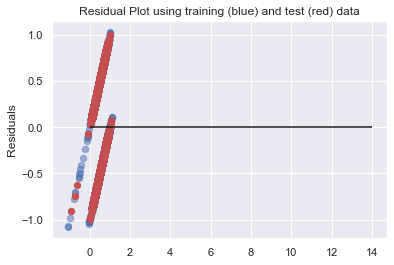

In [138]:
def plot_residuals(X_train, y_train, X_test, y_test):
    plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
    plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, c='r', s=40)
    plt.hlines(y=0, xmin=0, xmax=14)
    plt.title("Residual Plot using training (blue) and test (red) data")
    plt.ylabel("Residuals")
    
plot_residuals(X_train, y_train, X_test, y_test)    

### Decision Tree & AdaBoost & XGBoost

In [139]:
# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 1350 samples.
DecisionTreeClassifier trained on 13501 samples.
DecisionTreeClassifier trained on 135011 samples.
RandomForestClassifier trained on 1350 samples.
RandomForestClassifier trained on 13501 samples.
RandomForestClassifier trained on 135011 samples.
AdaBoostClassifier trained on 1350 samples.
AdaBoostClassifier trained on 13501 samples.
AdaBoostClassifier trained on 135011 samples.
XGBClassifier trained on 1350 samples.
XGBClassifier trained on 13501 samples.
XGBClassifier trained on 135011 samples.


In [140]:
# Run metrics visualization for the three supervised learning models chosen
#import visuals as vs
#vs.evaluate(results, accuracy, fscore)

### Feature Importance

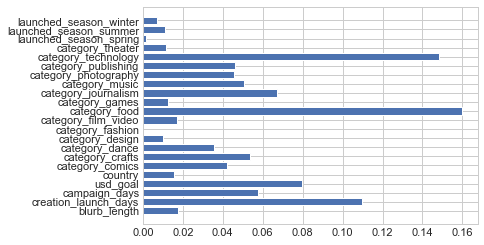

In [141]:
plt.style.use('seaborn-whitegrid')
importance = clf_D.feature_importances_
plt.barh(range(X_train.shape[1]), importance)
_= plt.yticks(np.arange(X_train.shape[1]), X_train.columns.values)

In [142]:
#Printing out the values
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
acc_test,0.59,0.61,0.62
acc_train,1.00,1.00,0.99
f_test,0.64,0.66,0.67
f_train,1.00,1.00,1.00
pred_time,0.01,0.02,0.02
train_time,0.01,0.12,1.09


RandomForestClassifier


,1%,10%,100%
acc_test,0.67,0.69,0.69
acc_train,1.00,1.00,1.00
f_test,0.70,0.72,0.72
f_train,1.00,1.00,1.00
pred_time,0.49,0.75,1.81
train_time,0.21,1.58,25.60


AdaBoostClassifier


,1%,10%,100%
acc_test,0.69,0.70,0.71
acc_train,0.72,0.66,0.65
f_test,0.72,0.73,0.73
f_train,0.74,0.70,0.69
pred_time,0.30,0.24,0.25
train_time,0.10,0.53,5.38


XGBClassifier


,1%,10%,100%
acc_test,0.69,0.71,0.71
acc_train,0.76,0.67,0.68
f_test,0.71,0.73,0.73
f_train,0.77,0.70,0.70
pred_time,0.13,0.11,0.12
train_time,0.26,2.25,23.06


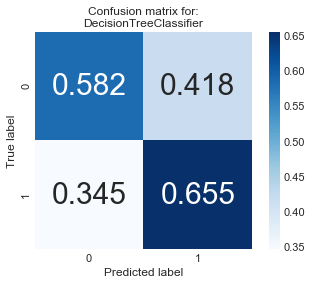

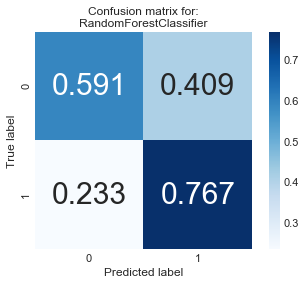

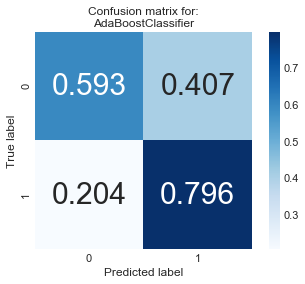

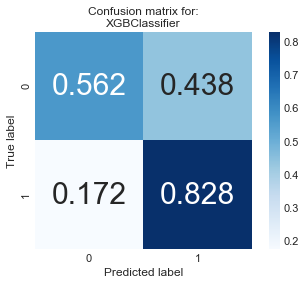

In [143]:
#Visualizing the confusion matrix for each classifier
from sklearn.metrics import confusion_matrix

for i,model in enumerate([clf_A,clf_B,clf_C,clf_D]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

## Plotting ROC AUC 

In [144]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

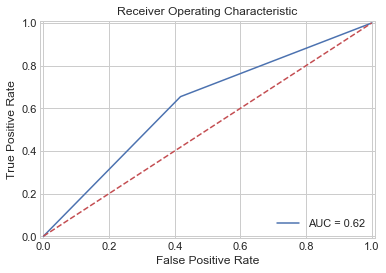

In [145]:
# ROC Decision Tree
plot_roc_curve(y_test, clf_A.predict(X_test))

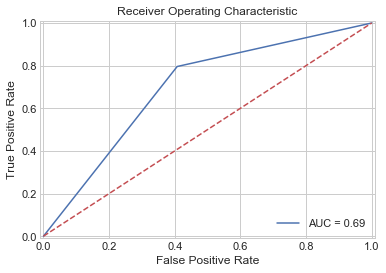

In [146]:
# ROC AdaBoost
plot_roc_curve(y_test, clf_C.predict(X_test))

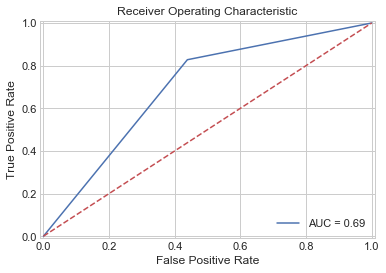

In [147]:
# ROC xgBoost
plot_roc_curve(y_test, clf_D.predict(X_test))

### Plotting the learning curve

In [148]:
def print_learning(X,y, model):
    print()
    print(format('Hoe to evaluate XGBoost model with learning curves','*^82'))
    import warnings
    warnings.filterwarnings("ignore")
    # load libraries
    import numpy as np
    from xgboost import XGBClassifier
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    from sklearn import datasets
    import matplotlib.pyplot as plt
    from sklearn.model_selection import learning_curve
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model,
                                               X, y, cv=10, scoring='accuracy', n_jobs=-1,
                                               # 50 different sizes of the training set
                                               train_sizes=np.linspace(0.01, 1.0, 10))
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    # Draw lines
    plt.subplots(1, figsize=(7,7))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout(); plt.show()


****************Hoe to evaluate XGBoost model with learning curves****************


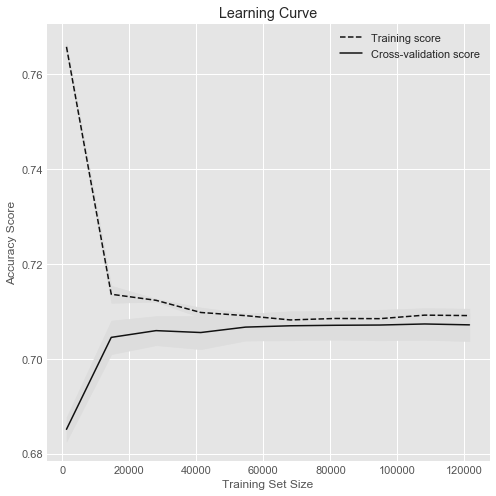

In [149]:
print_learning(X_train,y_train, clf_D)

# RandomSearch

In [151]:
#from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
#param_grid = {
#    'n_estimators': np.linspace(10, 200).astype(int),
#    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
#    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
#    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
#    'min_samples_split': [2, 5, 10],
#    'bootstrap': [True, False]
#}

# Estimator for use in random search
#estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
#rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
#                        scoring = 'accuracy', cv = 3, 
#                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
#rs.fit(X_train, y_train)

# GridSearch

## GridSearch Execution

In [153]:
#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
#Initialize the classifier
clf = XGBClassifier(base_estimator=DecisionTreeClassifier())
#Create the parameters list you wish to tune
parameters = {'n_estimators':[50, 120],
       'learning_rate':[0.1, 0.5, 1.],
       'base_estimator__min_samples_split' : np.arange(2, 8, 2),
       'base_estimator__max_depth' : np.arange(1, 4, 1)
       }
#Make an fbeta_score scoring object
scorer = make_scorer(accuracy_score)
#Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scorer)
#grid_obj = GridSearchCV(clf, parameters,scoring = 'accuracy')
#Fit the grid search object to the training data and find the optimal parameters
#grid_fit = grid_obj.fit(X_train,y_train)
# Get the estimator
#best_clf = grid_fit.best_estimator_
# Make predictions using the unoptimized and model
#predictions = (clf.fit(X_train, y_train)).predict(X_test)
#best_predictions = best_clf.predict(X_test)

#correlations = df.corrwith(df['target']).iloc[:-1].to_frame()
#correlations['abs'] = correlations[0].abs()
#sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
#fig, ax = plt.subplots(figsize=(10,20))
#sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

## Best Model after GridSearch

In [155]:
clf_best = XGBClassifier(base_estimator__max_depth=10, base_estimator__min_samples_split=3,
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=50, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [156]:
clf_best.fit(X_train, y_train)

XGBClassifier(base_estimator__max_depth=10, base_estimator__min_samples_split=3,
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=50, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [157]:
clf_best.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0])

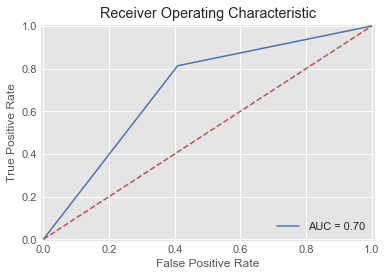

In [158]:
plot_roc_curve(y_test, clf_best.predict(X_test))

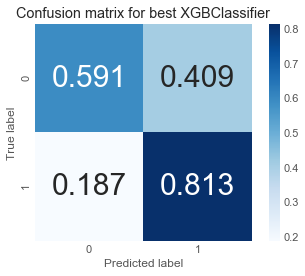

In [161]:
cm = confusion_matrix(y_test, clf_best.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# view with a heatmap
sns.heatmap(cm, annot=True, annot_kws={"size":30}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for best XGBClassifier'.format(model.__class__.__name__));

In [185]:
#d = {'Acc': accuracy_score(y_test, clf_best.predict(X_test)).round(2)}
#d
acc = accuracy_score(y_test, clf_best.predict(X_test)).round(2)
print('Accuracy of best XGBoost Classifier is','{0:.0%}'.format(acc))

Accuracy of best XGBoost Classifier is 72%


# Recommendations

Preparation Length - Creation to Launch Time 
* successful projects tend to have a longer time from Creation to Launch

Duration
* Shorter campaigns perform better

Goal Setting                
* Don’t set the bar too high

Season counts                
* Start your campaign in Spring!

# Future Work

* FEATURE ENGINEERING - Build more sophisticated features

* NLP - Use Natural Language Processing to analyze project description

* GRANULARITY - Take more granular data into consideration